# Install dependencies



In [2]:

# Importing libraries for data manipulation, visualization, and machine learning.
from ucimlrepo import fetch_ucirepo  # Fetch datasets from UCI Machine Learning Repository
import pandas as pd  # Data manipulation with Pandas
import numpy as np  # Mathematical operations with NumPy
import matplotlib.pyplot as plt  # Plotting with Matplotlib
import seaborn as sns  # Advanced data visualization with Seaborn
%matplotlib inline  # Ensures plots are displayed inline in notebooks

# Importing machine learning libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Feature scaling
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors classification
from sklearn.pipeline import Pipeline  # To create machine learning pipelines
from sklearn.metrics import classification_report, confusion_matrix  # Performance metrics
from sklearn.model_selection import train_test_split, GridSearchCV  # Data splitting and hyperparameter tuning
from sklearn.svm import SVC  # Support Vector Classification
from sklearn.metrics import RocCurveDisplay  # ROC curve visualization
import plotly.graph_objs as go  # Interactive plotting with Plotly
from sklearn.manifold import TSNE  # t-SNE for dimensionality reduction
import joblib  # Saving and loading machine learning models
from sklearn.decomposition import PCA  # Principal Component Analysis
from sklearn.tree import DecisionTreeClassifier, export_graphviz  # Decision tree classification and visualization
from graphviz import Source  # Visualizing decision trees
from sklearn.linear_model import LogisticRegression  # Logistic regression classification
from sklearn.naive_bayes import GaussianNB  # Naive Bayes classification


#Getting data

In [3]:
# Fetching the dataset for predicting students' dropout and academic success from the UCI repository.
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# Extracting features (X) and targets (Y) from the dataset.
X = predict_students_dropout_and_academic_success.data.features
Y = predict_students_dropout_and_academic_success.data.targets

# Printing metadata and variables of the dataset to understand its structure.
print(predict_students_dropout_and_academic_success.metadata)
print(predict_students_dropout_and_academic_success.variables)

# Saving the feature matrix (X) and target vector (Y) as .joblib files for later use.
joblib.dump(X, '/vars/X.joblib')
joblib.dump(Y, '/vars/Y.joblib')


{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

['Y.joblib']

In [4]:
# Combining the feature matrix (X) with the target vector (Y) into a single DataFrame for easy manipulation and visualization.
df = X.join(Y)
df.head()  # Displaying the first few rows of the dataset


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
# Providing summary statistics for each feature in the dataset.
df.describe()


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
# Counting the occurrences of each class in the target variable (Y), likely indicating the number of students in different academic categories (e.g., Graduate, Dropout, Enrolled).
Y.value_counts()


Target  
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

# Some statistics

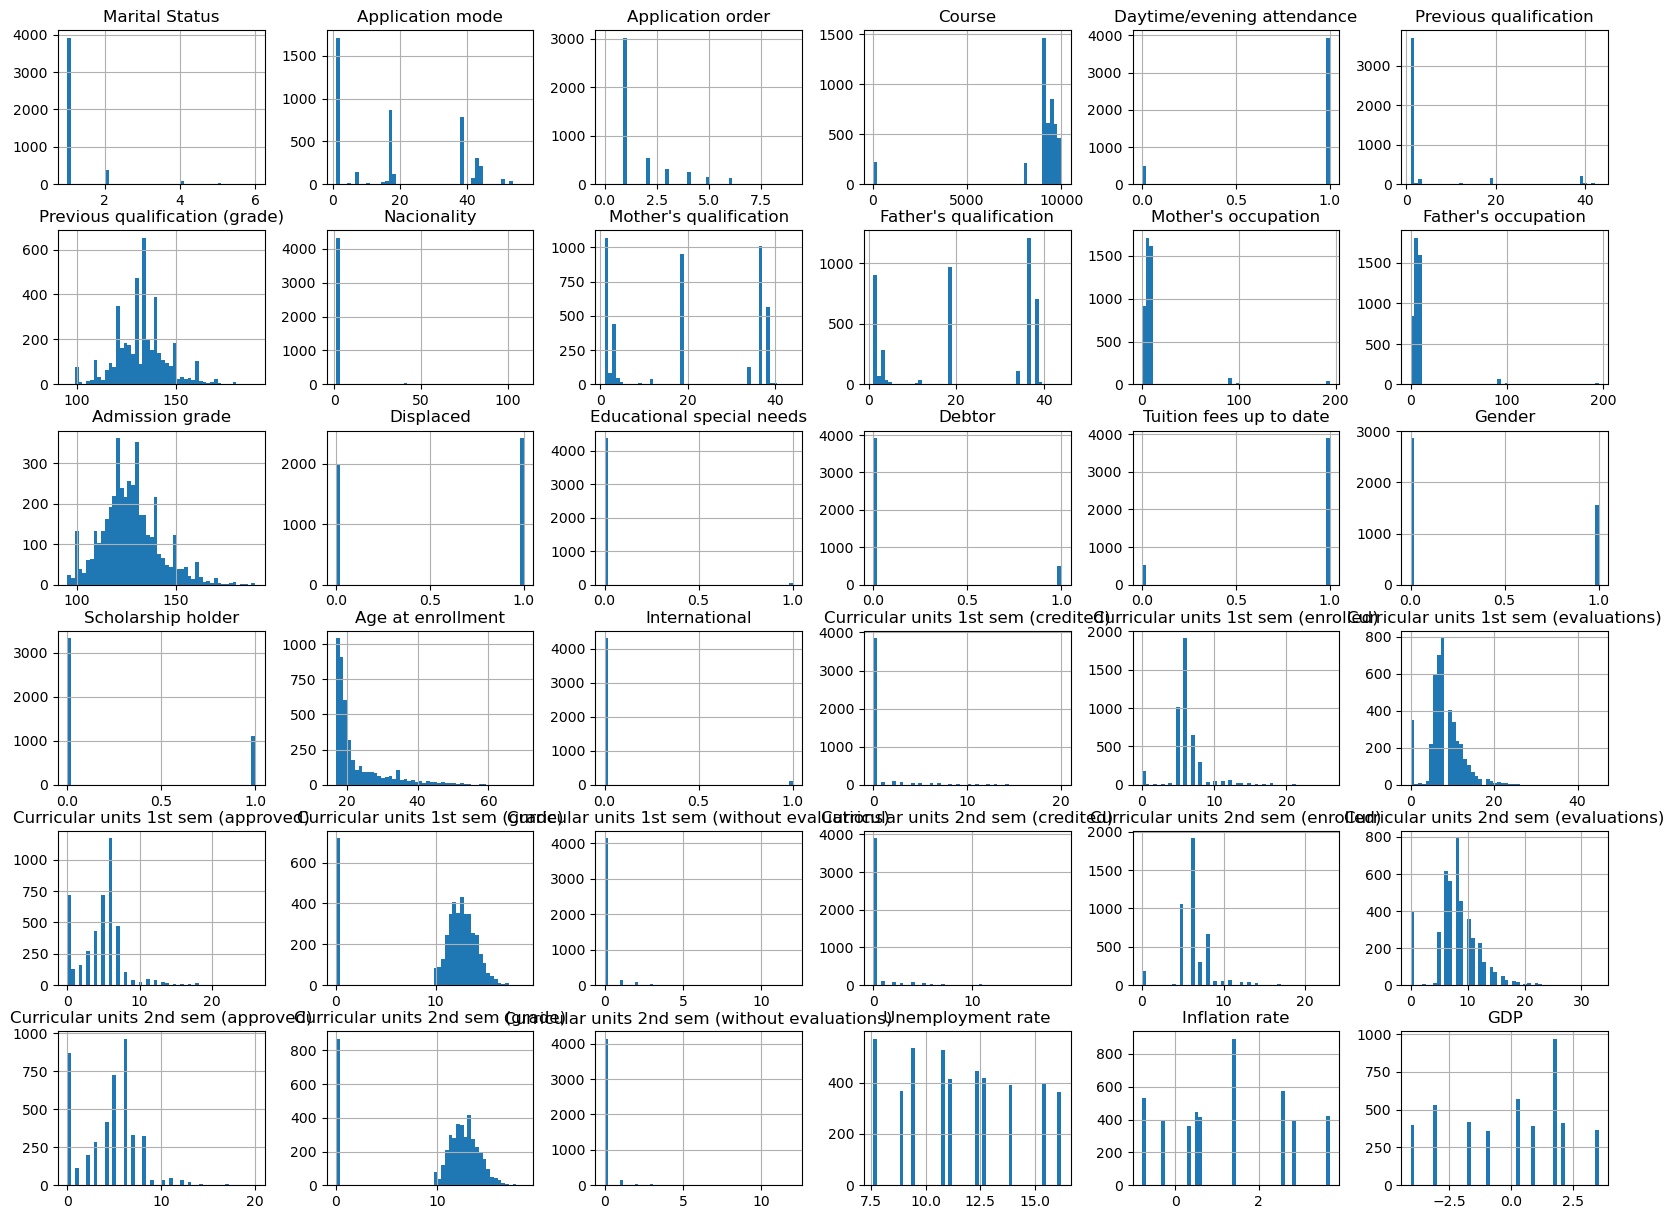

In [6]:
# Plotting histograms for all columns in the DataFrame `df`.
df[df.columns].hist(bins=50, figsize=(20,15))  

# Saving the plot to a file.
plt.savefig("images/Histogram.png")  

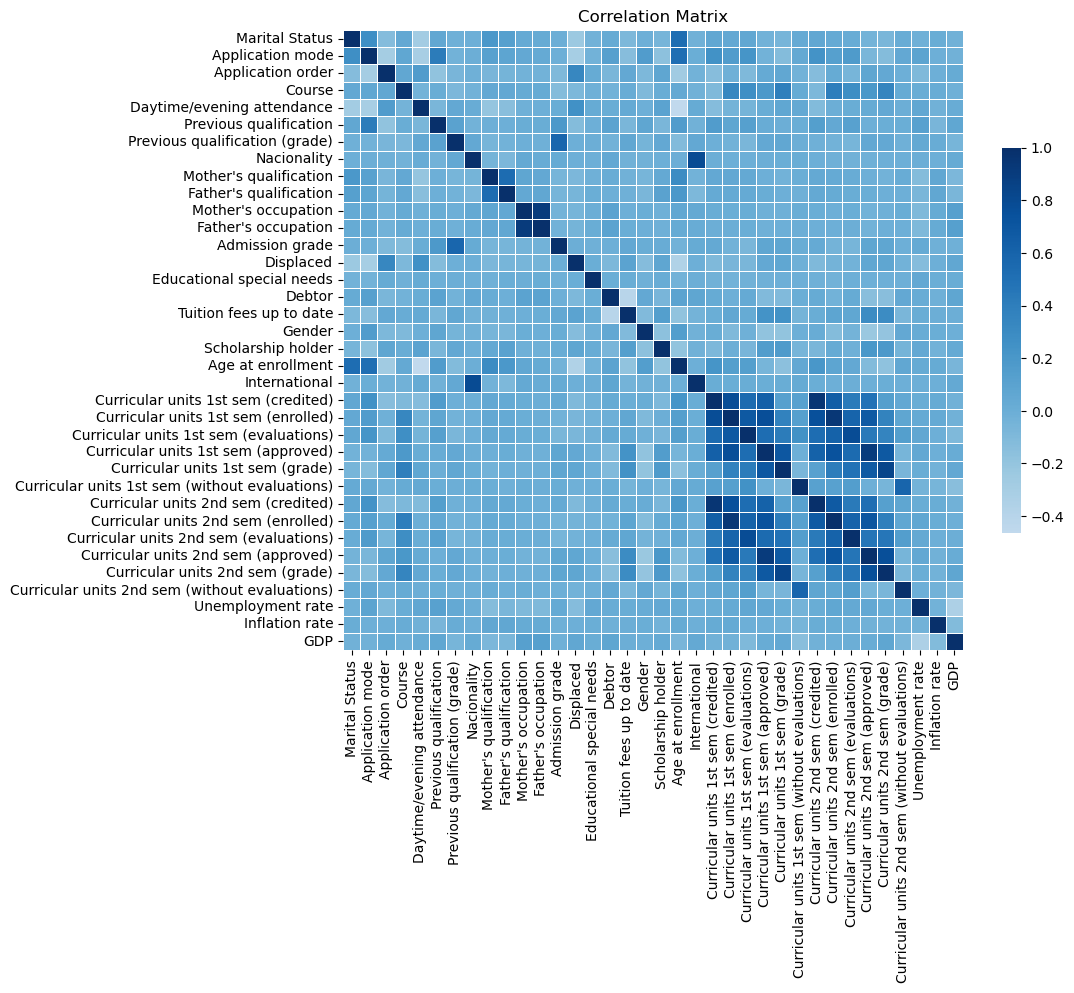

In [7]:
# Creating a new figure for the heatmap with a specific size.
plot = plt.figure(figsize=(10, 10))  # Set figure size to 10x10 inches.

# Generating a heatmap of the correlation matrix.
sns.heatmap(X.corr(), annot=False, cmap='Blues', square=True, center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.5})  # Create a heatmap using Seaborn.
# - X.corr(): Computes the correlation matrix of the DataFrame `X`.
# - annot=False: No annotation of correlation values on the heatmap.
# - cmap='Blues': Use the 'Blues' colormap to represent the correlation values.
# - square=True: Ensures that each cell in the heatmap is square-shaped.
# - center=0: The colormap is centered at 0 (neutral correlation).
# - linewidths=0.5: Sets the width of the lines between cells.
# - cbar_kws={"shrink": 0.5}: Shrinks the color bar to 50% of its default size.

# Adding a title to the heatmap.
plt.title('Correlation Matrix')  

# Saving the heatmap as a PNG image.
plt.savefig("images/Correlation.png")  


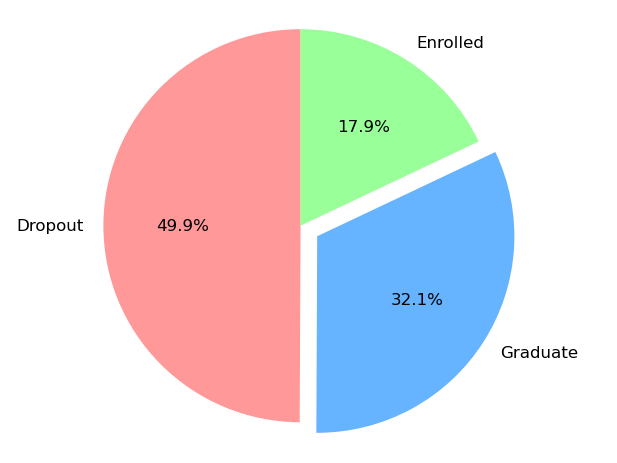

In [8]:
# Updating the font size globally for the plot.
plt.rcParams.update({'font.size': 12})  

# Defining labels and sizes for the pie chart.
labels = ['Dropout', 'Graduate', 'Enrolled']  # Labels for the slices of the pie chart.
sizes = Y.value_counts().values  # Sizes of the slices are based on the frequency of each class in `Y`.

# Explode one slice (Graduate) to emphasize it.
explode = (0, 0.1, 0)  # "Graduate" slice is slightly pulled out from the center.

# Defining the colors for the slices of the pie chart.
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Custom colors for the slices.

# Creating a figure and axes for the pie chart.
fig1, ax1 = plt.subplots()  # Initialize a subplot for the pie chart.

# Creating the pie chart.
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', 
        shadow=False, startangle=90, colors=colors)
# - sizes: Sizes of the slices.
# - explode: Separates the "Graduate" slice for emphasis.
# - labels: Labels for each slice.
# - autopct='%1.1f%%': Displays the percentage value on each slice with one decimal place.
# - shadow=False: No shadow effect.
# - startangle=90: Starts the pie chart at a 90-degree angle.
# - colors: Custom colors for the slices.

# Ensuring the pie chart is drawn as a circle.
ax1.axis('equal')  # This makes sure the pie chart is perfectly circular.

# Adjusting the layout to fit elements within the figure area.
plt.tight_layout()  # Automatically adjusts the plot to fit within the figure area.

# Saving the pie chart as a PNG image.
plt.savefig("images/PieChart.png")  # Saves the pie chart image to the 'images' directory as 'PieChart.png'.

# Displaying the pie chart.
plt.show()  # Displays the pie chart in the output.


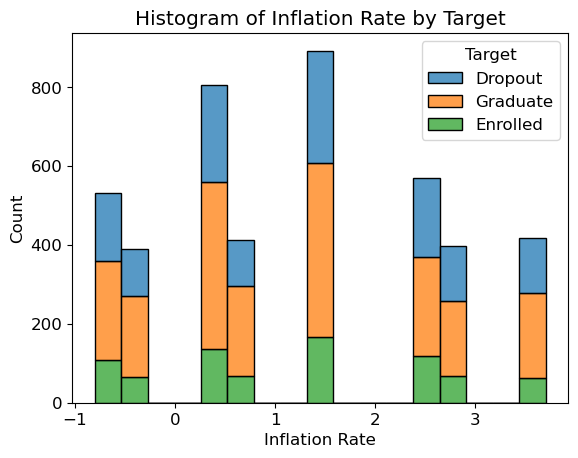

In [9]:
# Creating a stacked histogram of 'Inflation rate' with different hues representing the 'Target' variable.
sns.histplot(x='Inflation rate', data=df, hue='Target', multiple='stack')
# - x='Inflation rate': Specifies that the x-axis represents the 'Inflation rate' column.
# - data=df: Uses the DataFrame `df` as the data source.
# - hue='Target': Differentiates the histogram stacks by the 'Target' variable.
# - multiple='stack': Stacks the histograms for different values of 'Target'.

# Setting the labels and title for the histogram.
plt.xlabel('Inflation Rate')  # Label for the x-axis.
plt.ylabel('Count')  # Label for the y-axis.
plt.title('Histogram of Inflation Rate by Target')  # Title for the histogram.

# Saving the histogram plot as a PNG image.
plt.savefig("images/InflationRate.png") 

# Displaying the plot.
plt.show()  # Displays the histogram.


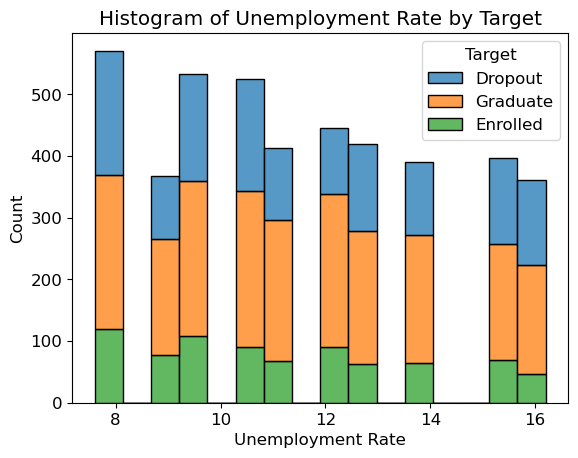

In [10]:
# Creating a stacked histogram of 'Unemployment rate' with different hues representing the 'Target' variable.
sns.histplot(x='Unemployment rate', data=df, hue='Target', multiple='stack')

# Setting the labels and title for the histogram.
plt.xlabel('Unemployment Rate')  # Label for the x-axis.
plt.ylabel('Count')  # Label for the y-axis.
plt.title('Histogram of Unemployment Rate by Target')  # Title for the histogram.

# Saving the histogram plot as a PNG image.
plt.savefig("images/UnemploymentRate.png") 

# Displaying the plot.
plt.show()  # Displays the histogram.


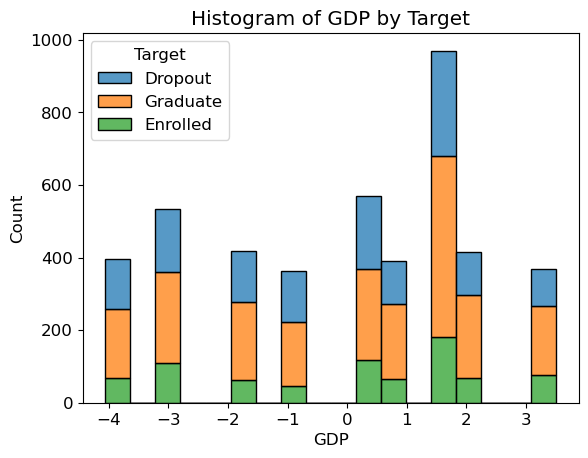

In [11]:
# Creating a stacked histogram of 'GDP' with different hues representing the 'Target' variable.
sns.histplot(x='GDP', data=df, hue='Target', multiple='stack')

# Setting the labels and title for the histogram.
plt.xlabel('GDP')  # Label for the x-axis.
plt.ylabel('Count')  # Label for the y-axis.
plt.title('Histogram of GDP by Target')  # Title for the histogram.

# Saving the histogram plot as a PNG image.
plt.savefig("images/GDP.png")  # Saves the histogram as 'GDP.png' in the 'images' directory.

# Displaying the plot.
plt.show()  # Displays the histogram.


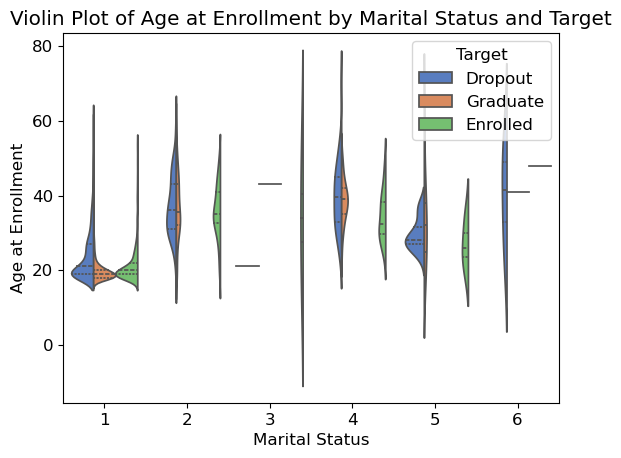

In [12]:
# Creating a violin plot to show the distribution of 'Age at enrollment' by 'Marital Status', split by 'Target'.
sns.violinplot(
    data=df,               # DataFrame containing the data.
    x='Marital Status',     # The x-axis represents the 'Marital Status' column.
    y='Age at enrollment',  # The y-axis represents the 'Age at enrollment' column.
    hue='Target',           # Data is split by the 'Target' variable (e.g., Dropout, Graduate).
    split=True,             # Splits the violins by 'Target' on either side of the violin plot.
    inner='quart',          # Displays inner quartiles within the violin plot.
    palette='muted'         # Sets a muted color palette for the plot.
)

# Setting the labels and title for the plot.
plt.xlabel('Marital Status')  # Label for the x-axis.
plt.ylabel('Age at Enrollment')  # Label for the y-axis.
plt.title('Violin Plot of Age at Enrollment by Marital Status and Target')  # Title of the plot.

# Adding a legend to the plot, with a title 'Target'.
plt.legend(title='Target')  # Customizes the legend title.

# Saving the violin plot as a PNG image.
plt.savefig("images/AgeEnrollmentViolin.png")  # Saves the violin plot as 'AgeEnrollmentViolin.png' in the 'images' directory.

# Displaying the plot.
plt.show()  # Displays the violin plot.


## t-SNE and PCA plots

In [14]:
# Scale the features in X using StandardScaler.
X_scaled = StandardScaler().fit_transform(X)
# - Standardizes the data by removing the mean and scaling to unit variance.
# - This is a common preprocessing step before applying algorithms like t-SNE.

# Apply t-SNE to reduce dimensionality to 3D.
tsne_3d = TSNE(n_components=3, random_state=42)
# - n_components=3: Reduces the data to 3 dimensions for 3D visualization.
# - random_state=42: Ensures reproducibility of the results.

X_tsne_3d = tsne_3d.fit_transform(X_scaled)
# - Transforms the scaled data using t-SNE, reducing it to three dimensions.

# Replace Y categories with numeric values for plotting or analysis.
Y_tsne = Y.replace({'Graduate': 0, 'Enrolled': 1, 'Dropout': 2}).astype(int).values.ravel()
# - Replaces the categorical values in 'Y' with integers.
# - 'Graduate' is mapped to 0, 'Enrolled' to 1, and 'Dropout' to 2.
# - Converts the target variable 'Y' to a 1D numpy array with integer labels.

# Save the processed t-SNE data using joblib for future use to avoid recomputation.
joblib.dump(X_tsne_3d, 'models/X_tsne_3d.joblib')
joblib.dump(Y_tsne, 'models/Y_tsne.joblib')
joblib.dump(X_scaled, 'models/X_scaled.joblib')
# - Saves the transformed 3D t-SNE data, target labels, and scaled feature data.
# - This avoids the need to recompute t-SNE every time, which can be time-consuming.


C:\Users\gabze\AppData\Local\Temp\ipykernel_22932\2395871949.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_tsne = Y.replace({'Graduate': 0, 'Enrolled': 1, 'Dropout': 2}).astype(int).values.ravel()


['X_scaled.joblib']

In [15]:
# Load X and Y from joblib file
X_tsne_3d = joblib.load('models/X_tsne_3d.joblib')
Y_tsne = joblib.load('models/Y_tsne.joblib')
X_scaled = joblib.load('models/X_scaled.joblib')
# - Loads the previously saved t-SNE data, target labels, and scaled feature data from joblib files.
# - Ensures that the same processed data can be reused for visualization or further analysis.

# Create graphic with plotly
fig = go.Figure(data=[go.Scatter3d(
    x=X_tsne_3d[:, 0],  # X-axis data from the first dimension of t-SNE output
    y=X_tsne_3d[:, 1],  # Y-axis data from the second dimension of t-SNE output
    z=X_tsne_3d[:, 2],  # Z-axis data from the third dimension of t-SNE output
    mode='markers',     # Sets the mode to 'markers' for scatter plot
    marker=dict(
        size=5,          # Sets the size of the markers
        color=Y_tsne,    # Define colors as Y_tsne values
        colorscale='Rainbow',  # Uses 'Rainbow' color scale for the markers
        opacity=0.8,     # Sets the opacity of the markers
        colorbar=dict(title="Target Variable")  # Adds a colorbar with a title
    )
)])

# Update layout for the 3D scatter plot
fig.update_layout(
    scene=dict(
        xaxis_title='Dimension 1',  # Title for the X-axis
        yaxis_title='Dimension 2',  # Title for the Y-axis
        zaxis_title='Dimension 3'   # Title for the Z-axis
    ),
    title='3D t-SNE Visualization'  # Title of the plot
)

# Display the plot in Colab
fig.show(renderer="colab")
# - Shows the 3D scatter plot using the Plotly library.
# - Renderer is set to "colab" for compatibility with Google Colab notebooks.


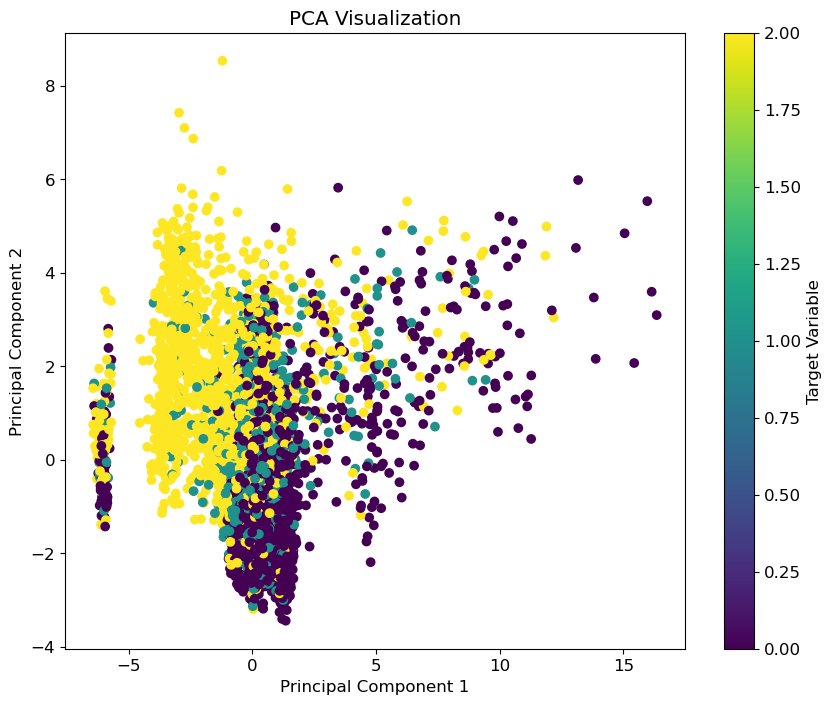

In [16]:
# Load Y_tsne from joblib file
Y_tsne = joblib.load('models/Y_tsne.joblib')

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
# - PCA (Principal Component Analysis) is used to reduce the feature space from higher dimensions to 2 dimensions.
# - 'n_components=2' specifies that the data should be transformed into 2 principal components.

# Create a scatter plot of the PCA components
plt.figure(figsize=(10, 8))
plt.scatter(components[:, 0], components[:, 1], c=Y_tsne)
# - Plots a scatter plot of the two principal components.
# - Colors the points based on the target variable Y_tsne.

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='Target Variable')
# - Labels the X and Y axes with 'Principal Component 1' and 'Principal Component 2'.
# - Adds a colorbar to indicate the mapping of colors to the target variable.

plt.show()
# - Displays the scatter plot.


#Approach
Now it's time to put the ML models side by side and decide wich one has the best overall accuracy.

## Train-Test Split

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)
# - Splits the dataset into training and testing subsets.
# - 'test_size=0.2' indicates that 20% of the data is reserved for testing.
# - 'shuffle=True' ensures that the data is shuffled before splitting.
# - 'random_state=42' ensures reproducibility of the split.

# Convert categorical target labels to numeric values
y_train = y_train.replace({'Graduate': 0, 'Enrolled': 1, 'Dropout': 2}).values.ravel()
y_test = y_test.replace({'Graduate': 0, 'Enrolled': 1, 'Dropout': 2}).values.ravel()
# - Replaces categorical labels in 'y_train' and 'y_test' with integer values.
# - 'Graduate' is mapped to 0, 'Enrolled' to 1, and 'Dropout' to 2.
# - Converts the target labels to a 1D numpy array with integer labels.


C:\Users\gabze\AppData\Local\Temp\ipykernel_22932\1266002635.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\gabze\AppData\Local\Temp\ipykernel_22932\1266002635.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [18]:
# Print the shape of the training and testing datasets
print(f"X_train shape: {X_train.shape}")
# - Displays the dimensions of the training feature set.

print(f"X_test shape: {X_test.shape}")
# - Displays the dimensions of the testing feature set.

print(f"y_train shape: {y_train.shape}")
# - Displays the dimensions of the training target labels.

print(f"y_test shape: {y_test.shape}")
# - Displays the dimensions of the testing target labels.

# Print the length of the training and testing datasets
print(f"Train length: {len(X_train)}")
# - Displays the number of samples in the training feature set.

print(f"Test length: {len(X_test)}")
# - Displays the number of samples in the testing feature set.


X_train shape: (3539, 36)
X_test shape: (885, 36)
y_train shape: (3539,)
y_test shape: (885,)
Train length: 3539
Test length: 885



# K-Nearest Neighbours (KNN)

K-Nearest Neighbors (KNN) is a simple and intuitive algorithm used for both classification and regression tasks. It makes predictions based on the $k$ nearest training examples in the feature space. The algorithm is based on the principle that similar instances are likely to be close to each other.

**Key Concepts:**

1. **Distance Metric:**
   - KNN relies on a distance metric to determine the closeness of instances. Commonly used metrics include:
     - **Euclidean Distance:** 
       $$
       d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
       $$
     - **Manhattan Distance:**
       $$
       d(x, y) = \sum_{i=1}^{n} |x_i - y_i|
       $$
     - **Minkowski Distance:**
       $$
       d(x, y) = \left(\sum_{i=1}^{n} |x_i - y_i|^p\right)^{\frac{1}{p}}
       $$
       where $p$ is a parameter that defines the distance metric.

2. **K Parameter:**
   - The parameter $k$ represents the number of nearest neighbors to consider. The choice of $k$ affects the algorithm's performance:
     - **Small $k$:** More sensitive to noise, may overfit the training data.
     - **Large $k$:** More robust to noise, but may smooth out class boundaries and underfit the data.

3. **Classification:**
   - In classification tasks, the algorithm assigns the class label based on the majority vote among the $k$ nearest neighbors. The class with the most occurrences among the neighbors is chosen as the prediction.

4. **Regression:**
   - In regression tasks, the algorithm predicts the value based on the average (or weighted average) of the $k$ nearest neighbors' target values.

5. **Algorithm Steps:**
   1. **Select the Value of $k$:** Choose the number of neighbors to consider.
   2. **Compute Distance:** Calculate the distance between the query instance and all training instances.
   3. **Find Nearest Neighbors:** Identify the $k$ nearest training instances.
   4. **Make Prediction:**
      - For classification: Assign the class with the majority vote among the $k$ neighbors.
      - For regression: Compute the average of the target values of the $k$ neighbors.

**Advantages:**

- **Simplicity:** Easy to understand and implement.
- **Non-Parametric:** No explicit training phase, making it flexible to model different types of data.

**Limitations:**

- **Computational Cost:** As the size of the dataset grows, computing distances between instances becomes costly.
- **Memory Intensive:** Requires storing the entire training dataset.
- **Curse of Dimensionality:** Performance can degrade with high-dimensional data unless proper dimensionality reduction techniques are applied.

For more details, please refer to [KNN Classifier - SKlearn](https://scikit-learn.org/stable/modules/neighbors.html#id4).

In [19]:
# Create a pipeline for K-Nearest Neighbors with scaling
knn_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),      # Standardizes the features before applying the classifier
    ('knn', KNeighborsClassifier())    # K-Nearest Neighbors classifier
])
knn_pipeline.fit(X_train, y_train)
# - Fits the pipeline on the training data, which includes scaling and KNN classification.

# Create a list of neighbors to test in GridSearchCV
list_of_neighbours = []
for i in range(1, 50):
    list_of_neighbours.append(i)
print(list_of_neighbours)
# - Generates a list of integers from 1 to 49 to be used as possible values for the number of neighbors in KNN.

# Define the parameter grid for GridSearchCV
search_params = {'knn__n_neighbors': list_of_neighbours}
# - Specifies the parameter grid for GridSearchCV, where 'knn__n_neighbors' is the number of neighbors to be tested.

# Initialize and fit GridSearchCV
grid = GridSearchCV(knn_pipeline, param_grid=search_params, cv=5, n_jobs=-1, verbose=4)
grid.fit(X_train, y_train)
# - Performs a grid search over the specified parameter grid with 5-fold cross-validation.
# - 'n_jobs=-1' uses all available cores for computation.
# - 'verbose=4' provides detailed logging of the grid search process.


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             verbose=4)

## Results

Best params: {'knn__n_neighbors': 13}
Best score: 0.7064156657796531


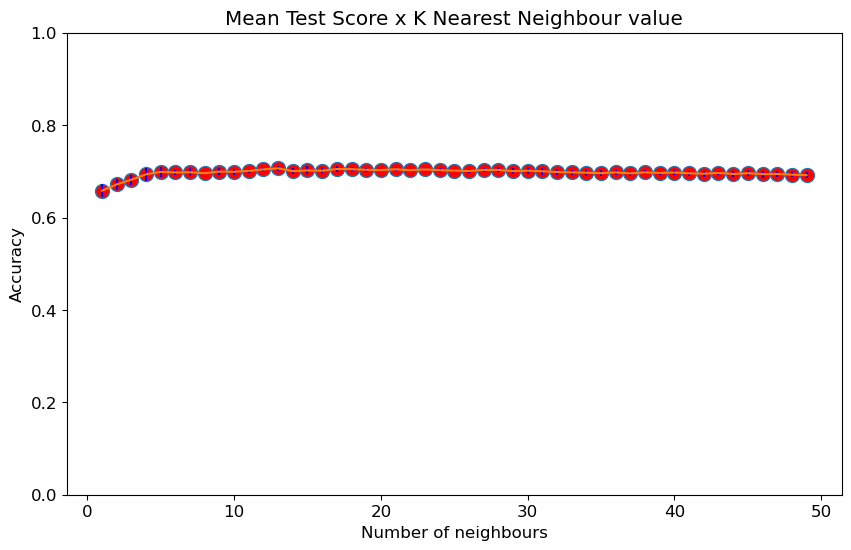

In [20]:
# Print the best parameters and score from GridSearchCV
print(f"Best params: {grid.best_params_}")
# - Displays the best parameter values found during the grid search.

print(f"Best score: {grid.best_score_}")
# - Displays the best mean cross-validated score achieved with the best parameters.

# Plotting the performance of different numbers of neighbors
plt.figure(figsize=(10, 6))
plt.plot(list_of_neighbours, grid.cv_results_['mean_test_score'], linestyle='--', marker='o', markerfacecolor='red', markersize=10)
# - Plots the mean test scores for different numbers of neighbors.
# - 'linestyle="--"' specifies a dashed line for the plot.
# - 'marker="o"' adds circular markers at each data point.
# - 'markerfacecolor="red"' sets the color of the markers.
# - 'markersize=10' sets the size of the markers.

plt.errorbar(list_of_neighbours, grid.cv_results_['mean_test_score'], yerr=grid.cv_results_['std_test_score'], ecolor='blue')
# - Adds error bars to the plot to represent the standard deviation of the test scores.
# - 'yerr' specifies the error values.
# - 'ecolor="blue"' sets the color of the error bars.

plt.ylim(0, 1)
# - Sets the y-axis limit from 0 to 1 to ensure that the plot covers the full range of accuracy scores.

plt.title('Mean Test Score x K Nearest Neighbour value')
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show()
# - Sets the plot title and axis labels.
# - Displays the plot.


RESULTS

Test Accuracy:  0.6971751412429379
Train accuracy:  0.739756993500989
              precision    recall  f1-score   support

           0       0.67      0.95      0.79       418
           1       0.35      0.15      0.21       151
           2       0.86      0.62      0.72       316

    accuracy                           0.70       885
   macro avg       0.63      0.57      0.57       885
weighted avg       0.69      0.70      0.66       885



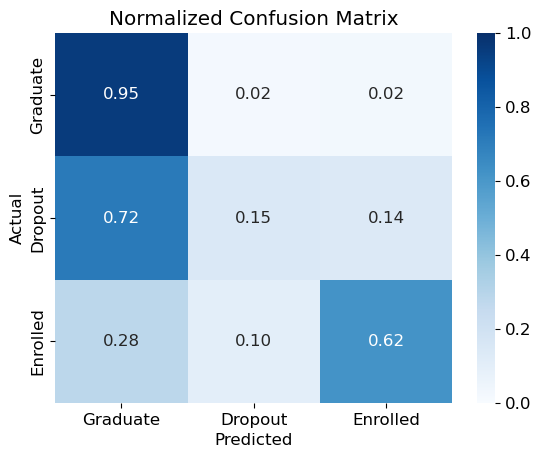

In [21]:
# Print the accuracy of the best estimator on the test set
print("Test Accuracy: ", grid.best_estimator_.score(X_test, y_test))
# - Displays the accuracy of the best KNN model on the testing data.

# Print the accuracy of the best estimator on the training set
print("Train accuracy: ", grid.best_estimator_.score(X_train, y_train))
# - Displays the accuracy of the best KNN model on the training data.

# Print a classification report for the test set
print(classification_report(y_test, grid.best_estimator_.predict(X_test)))
# - Provides a detailed classification report including precision, recall, and F1-score for each class.

# Compute and plot the normalized confusion matrix
cmat = confusion_matrix(
    y_test,
    grid.best_estimator_.predict(X_test),
    normalize='true',
    labels=[0, 1, 2]
)
# - Computes the confusion matrix for the test set, normalized to show proportions.

# Create a heatmap for the confusion matrix
ax = sns.heatmap(
    cmat,
    annot=True,                # Annotates the heatmap with the confusion matrix values
    cmap='Blues',              # Sets the color map to 'Blues'
    fmt='.2f',                # Formats the annotations to 2 decimal places
    cbar=True,                 # Displays a color bar
    vmin=0,                    # Sets the minimum value for the color scale
    vmax=1                     # Sets the maximum value for the color scale
)

# Set labels and title for the heatmap
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Normalized Confusion Matrix')
ax.xaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
ax.yaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])

# Save the heatmap as an image file
plt.savefig("images/ConfusionMatrix_KNN.png")
# - Saves the heatmap to the specified path.

# Display the heatmap
plt.show()


# Decision Trees
 
Decision Trees are a popular and intuitive method for both classification and regression tasks. They work by recursively splitting the data into subsets based on feature values, forming a tree-like structure where each internal node represents a decision based on a feature, and each leaf node represents an outcome.

**Key Concepts:**

1. **Tree Structure:**
   - **Root Node:** Represents the entire dataset and is the starting point of the tree.
   - **Internal Nodes:** Represent decisions or tests on features. Each internal node splits the data into subsets based on the outcome of the test.
   - **Leaf Nodes:** Represent the final outcomes or predictions.

2. **Splitting Criteria:**
   - **Classification Trees:** Use criteria like Gini impurity or entropy to decide the best feature and threshold to split the data.
   - **Regression Trees:** Use criteria like mean squared error (MSE) to determine the best split.

3. **Gini Impurity:**
   - Measures the impurity of a node. For a node with $n$ classes, the Gini impurity is given by:
     $$
     Gini(p) = 1 - \sum_{i=1}^{n} p_i^2
     $$
     where $p_i$ is the proportion of instances of class $i$ in the node.

4. **Entropy:**
   - Measures the amount of disorder or uncertainty in a node. For a node with $n$ classes, entropy is given by:
     $$
     Entropy(p) = - \sum_{i=1}^{n} p_i \log_2(p_i)
     $$
     where $p_i$ is the proportion of instances of class $i$ in the node.

5. **Pruning:**
   - A process to remove branches that have little importance, improving the model's generalization ability. Pruning helps in reducing overfitting.

**Algorithm:**

1. **Start at the Root Node:** Consider the entire dataset.
2. **Choose the Best Feature and Threshold:** Use criteria like Gini impurity or entropy to find the best split.
3. **Split the Dataset:** Divide the dataset into subsets based on the chosen feature and threshold.
4. **Repeat:** Recursively apply the above steps to each subset until a stopping criterion is met (e.g., maximum depth, minimum samples per leaf).
5. **Make Predictions:** For a new instance, traverse the tree from the root to a leaf node to obtain the prediction.

**Advantages:**

- Easy to interpret and visualize.
- Handles both numerical and categorical data.
- Non-parametric, meaning no assumptions about data distribution are required.

**Limitations:**

- Can easily overfit the data, especially with deep trees. (Further you will see that happening in "real life")
- Sensitive to small variations in the data.
- Can be biased towards features with more levels.

  For more details you can refer to [Decision Trees - SKlearn](https://scikit-learn.org/stable/modules/tree.html).



In [1]:
# Create a pipeline for Decision Tree Classifier with scaling
dec_tree_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),             # Standardizes features before applying the classifier
    ('dec_tree', DecisionTreeClassifier(random_state=42))  # Decision Tree classifier with fixed random state for reproducibility
])

# Fit the pipeline on the training data
dec_tree_pipeline.fit(X_train, y_train)

# Predict the labels for the test set using the fitted pipeline
y_tree_predicted = dec_tree_pipeline.predict(X_test)
# - Predicts the labels for the test set with the fitted decision tree model.

# Extract the fitted decision tree model from the pipeline
dec_tree = dec_tree_pipeline.named_steps['dec_tree']
# - Retrieves the DecisionTreeClassifier instance from the pipeline.

# Export the decision tree visualization to a DOT file
export_graphviz(
    dec_tree,                          # The fitted decision tree model
    out_file="tree.dot",               # File to write the DOT format of the tree
    feature_names=X.columns,           # Names of the features for the tree
    class_names=Y.Target.unique(),     # Class names for the target variable
    rounded=True,                      # Rounds the corners of the nodes in the tree visualization
    filled=True                        # Fills the nodes with colors to represent the classes
)

# Convert DOT file to PNG or visualize it
Source.from_file("tree.dot")
# - Uses the `Source` class from `graphviz` to visualize or convert the DOT file.



SyntaxError: invalid syntax (4137343191.py, line 32)

**NOTE: Due to the number of genes, it is probably overfitting the data.**

## Results

Accuracy:  0.6757062146892655
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       418
           1       0.36      0.40      0.38       151
           2       0.72      0.64      0.68       316

    accuracy                           0.68       885
   macro avg       0.62      0.61      0.61       885
weighted avg       0.68      0.68      0.68       885

[[336  41  41]
 [ 54  61  36]
 [ 46  69 201]]


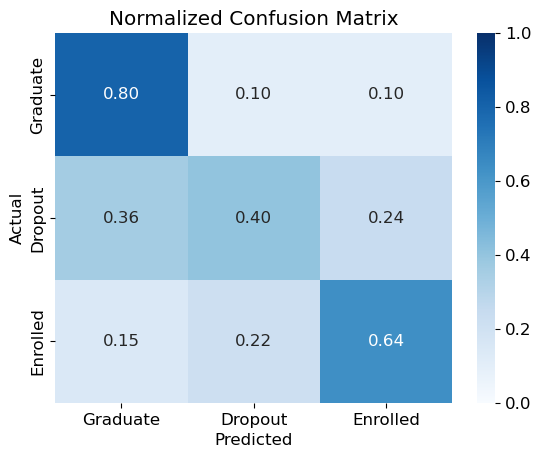

In [23]:
# Print the accuracy of the Decision Tree model on the test set
print("Accuracy: ", dec_tree_pipeline.score(X_test, y_test))
# - Displays the accuracy of the Decision Tree model on the test set.

# Print a classification report for the test set
print(classification_report(y_test, y_tree_predicted))
# - Provides a detailed classification report including precision, recall, and F1-score for each class.

# Print the confusion matrix for the test set
print(confusion_matrix(y_test, y_tree_predicted))
# - Displays the raw confusion matrix showing the counts of true vs. predicted labels.

# Compute and plot the normalized confusion matrix
cmat = confusion_matrix(
    y_test,
    y_tree_predicted,
    normalize='true',  # Normalizes the confusion matrix to show proportions
    labels=[0, 1, 2]   # Specifies the labels for the confusion matrix
)

# Create a heatmap for the confusion matrix
ax = sns.heatmap(
    cmat,
    annot=True,                # Annotates the heatmap with the confusion matrix values
    cmap='Blues',              # Sets the color map to 'Blues'
    fmt='.2f',                # Formats the annotations to 2 decimal places
    cbar=True,                 # Displays a color bar
    vmin=0,                    # Sets the minimum value for the color scale
    vmax=1                     # Sets the maximum value for the color scale
)

# Set labels and title for the heatmap
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Normalized Confusion Matrix')
ax.xaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
ax.yaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])

# Save the heatmap as an image file
plt.savefig("images/ConfusionMatrix_DecisionTree.png")
# - Saves the heatmap to the specified path.

# Display the heatmap
plt.show()


# Logistic Regression

Logistic Regression is a statistical method used for binary classification problems, where the goal is to predict which of two possible outcomes a given input belongs to. Despite its name, logistic regression is used for classification, not regression.

**How It Works:**

1. **Modeling Probability:**  
   Logistic Regression models the probability that a given input belongs to a particular class. For binary classification, this is typically done by estimating the probability that an observation belongs to class 1 (or positive class) rather than class 0 (or negative class). The output of the logistic regression model is a probability value between 0 and 1. This is achieved by applying the logistic function (or sigmoid function) to a linear combination of the input features.

2. **Sigmoid Function:**  
   The logistic function or sigmoid function is given by:
   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
   where $z$ is the linear combination of input features. The function transforms any real-valued number into a value between 0 and 1, making it suitable for modeling probabilities.

3. **Linear Combination:**  
   The linear combination of input features is:
   $$
   z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n
   $$
   where $\beta_0$ is the intercept, and $ (\beta_1, \beta_2, \ldots, \beta_n) $ are the coefficients of the input features $( x_1, x_2, \ldots, x_n)$.

4. **Decision Boundary:**  
   The model uses the sigmoid function to output a probability. A threshold (commonly 0.5) is used to convert this probability into a binary prediction. If the probability is greater than or equal to the threshold, the prediction is class 1; otherwise, it is class 0.

5. **Training the Model:**  
   The coefficients $( \beta )$ are learned from the training data by maximizing the likelihood function. This process is typically done using optimization algorithms like gradient descent.

6. **Interpretability:**  
   Logistic Regression provides interpretable results as the coefficients can be used to understand the impact of each feature on the probability of the positive class.

**Advantages of Logistic Regression:**
- Simple and easy to implement.
- Provides probabilities for predictions, which can be useful for understanding confidence levels.
- Can be extended to multiclass classification using techniques such as One-vs-Rest (OvR) or Softmax regression.

**Limitations of Logistic Regression:**
- Assumes a linear relationship between the input features and the log-odds of the target variable.
- May not perform well on complex datasets with non-linear relationships without feature engineering or transformation.

For more details, refer to [Logistic Regression - SKlearn](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression).


In [24]:
# Create a pipeline for Logistic Regression with scaling
log_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),      # Standardizes features before applying the classifier
    ('log', LogisticRegression())      # Logistic Regression classifier
])

# Fit the pipeline on the training data
log_pipeline.fit(X_train, y_train)
# - Fits the pipeline, which includes scaling and logistic regression, on the training data.

# Predict the labels for the test set using the fitted pipeline
y_log_predicted = log_pipeline.predict(X_test)
# - Predicts the labels for the test set with the fitted logistic regression model.


## Results

Accuracy:  0.752542372881356
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       418
           1       0.45      0.28      0.34       151
           2       0.83      0.77      0.80       316

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.73      0.75      0.74       885

[[380  24  14]
 [ 74  42  35]
 [ 45  27 244]]


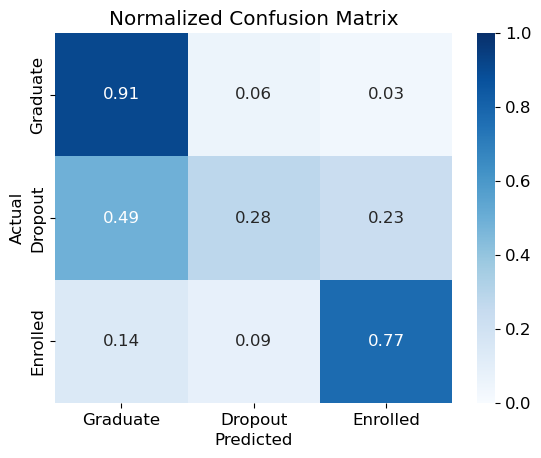

In [25]:
# Print the accuracy of the Logistic Regression model on the test set
print("Accuracy: ", log_pipeline.score(X_test, y_test))
# - Displays the accuracy of the Logistic Regression model on the test set.

# Print a classification report for the test set
print(classification_report(y_test, y_log_predicted))
# - Provides a detailed classification report including precision, recall, and F1-score for each class.

# Print the confusion matrix for the test set
print(confusion_matrix(y_test, y_log_predicted))
# - Displays the raw confusion matrix showing the counts of true vs. predicted labels.

# Compute and plot the normalized confusion matrix
cmat = confusion_matrix(
    y_test,
    y_log_predicted,
    normalize='true',  # Normalizes the confusion matrix to show proportions
    labels=[0, 1, 2]   # Specifies the labels for the confusion matrix
)

# Create a heatmap for the confusion matrix
ax = sns.heatmap(
    cmat,
    annot=True,                # Annotates the heatmap with the confusion matrix values
    cmap='Blues',              # Sets the color map to 'Blues'
    fmt='.2f',                # Formats the annotations to 2 decimal places
    cbar=True,                 # Displays a color bar
    vmin=0,                    # Sets the minimum value for the color scale
    vmax=1                     # Sets the maximum value for the color scale
)

# Set labels and title for the heatmap
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Normalized Confusion Matrix')
ax.xaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
ax.yaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])

# Save the heatmap as an image file
plt.savefig("images/ConfusionMatrix_LogisticRegression.png")

# Display the heatmap
plt.show()


## Support Vector Machines (SVMs)

Support Vector Machines are a powerful class of supervised learning algorithms used for both classification and regression tasks. They are designed to find the optimal hyperplane that separates data into different classes with the maximum margin. SVMs are particularly effective in high-dimensional spaces and are known for their robustness in classification tasks.

**Key Concepts:**

1. **Hyperplane:**  
   In an $n$-dimensional space, a hyperplane is an $(n-1)$-dimensional plane that separates data into two classes. For example, in a 2D space, the hyperplane is a line, while in a 3D space, it is a plane.

2. **Margin:**  
   The margin is the distance between the hyperplane and the nearest data points from either class, known as support vectors. SVM aims to maximize this margin to achieve better separation between classes.

3. **Support Vectors:**  
   Support vectors are the data points that are closest to the hyperplane and influence its position. These points are critical as they define the optimal margin.

4. **Optimal Hyperplane:**  
   The optimal hyperplane is the one that maximizes the margin between the classes. Mathematically, this is achieved by solving an optimization problem to maximize the margin subject to the constraints that data points are correctly classified.

**Mathematical Formulation:**

For a binary classification problem, given a dataset $\{(x_i, y_i)\}$ where $x_i$ represents the features and $y_i$ represents the class labels $(y_i \in \{+1, -1\})$, SVM aims to find a hyperplane defined by:
$$
w \cdot x + b = 0
$$
where \(w\) is the weight vector and \(b\) is the bias term.

The objective is to maximize the margin $\frac{2}{\|w\|}$, which is equivalent to minimizing $\frac{1}{2} \|w\|^2$ subject to:
$$
y_i (w \cdot x_i + b) \geq 1
$$

**Kernel Trick:**

- **Linear vs. Non-linear Data:**  
  SVM is primarily a linear classifier. However, real-world data may not always be linearly separable. The kernel trick allows SVM to handle non-linearly separable data by mapping it to a higher-dimensional space where a linear separation is possible.

- **Common Kernels:**
  - **Polynomial Kernel:**
    $$
    K(x_i, x_j) = (x_i \cdot x_j + c)^d
    $$
  - **Radial Basis Function (RBF) Kernel:**
    $$
    K(x_i, x_j) = e^{-\gamma \|x_i - x_j\|^2}
    $$
  - **Sigmoid Kernel:**
    $$
    K(x_i, x_j) = \tanh(\alpha (x_i \cdot x_j) + c)
    $$

**Applications:**

- **Classification:**  
  SVMs are used for tasks like image classification, text classification, and bioinformatics.

- **Regression (Support Vector Regression - SVR):**  
  SVM can also be adapted for regression problems where the goal is to fit a function that deviates from the actual values by a margin of tolerance.

**Advantages:**

- Effective in high-dimensional spaces.
- Robust to overfitting, especially in high-dimensional space.
- Works well with a clear margin of separation.

**Limitations:**

- Memory-intensive, especially with large datasets.
- The choice of kernel and hyperparameters can be crucial and may require extensive tuning.
- Not suitable for very large datasets due to high computational complexity.

In summary, Support Vector Machines are a versatile and powerful tool for classification and regression tasks, particularly useful in cases where a clear margin of separation exists between classes. The kernel trick extends their applicability to non-linearly separable data by transforming it into a higher-dimensional space.

[Support Vector Machines - SKlearn](https://scikit-learn.org/stable/modules/svm.html)


In [26]:
# Create a pipeline that first scales the features and then applies Support Vector Classification (SVC).
clf = make_pipeline(StandardScaler(), SVC(cache_size=2000))
# - StandardScaler: Scales the features to have zero mean and unit variance, which is important for SVM.
# - SVC: Support Vector Classification algorithm with caching set to 2000 MB to speed up computations for large datasets.

# Fit the pipeline on the training data.
clf.fit(X_train, y_train)
# - Trains the SVC model on the scaled training data.

# Predict the labels for the test data using the trained model.
y_svm_predicted = clf.predict(X_test)
# - Uses the fitted SVC model to predict the class labels of the test data.


## Results

Accuracy:  0.7548022598870057
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       418
           1       0.48      0.32      0.38       151
           2       0.89      0.72      0.79       316

    accuracy                           0.75       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.75      0.75      0.74       885

[[393  18   7]
 [ 81  48  22]
 [ 55  34 227]]


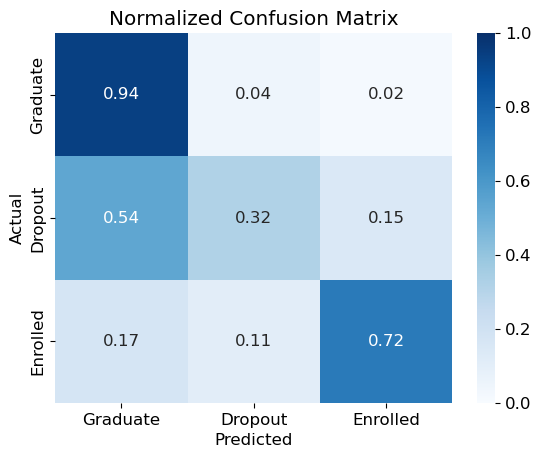

In [27]:
# Print the accuracy of the SVM model on the test set.
print("Accuracy: ", clf.score(X_test, y_test))
# - Evaluates and displays the accuracy of the SVM model on the test data.

# Print the classification report for the test set predictions.
print(classification_report(y_test, y_svm_predicted))
# - Provides a detailed classification report including precision, recall, and F1-score for each class.

# Print the confusion matrix for the test set predictions.
print(confusion_matrix(y_test, y_svm_predicted))
# - Displays the confusion matrix showing the counts of true positive, false positive, true negative, and false negative predictions.

# Compute the normalized confusion matrix for better visual comparison.
cmat = confusion_matrix(
      y_test,
      y_svm_predicted,
      normalize='true',
      labels=[0, 1, 2])
# - Normalize the confusion matrix to show the proportion of correctly and incorrectly classified instances.
# - Use the labels `[0, 1, 2]` to correspond to classes 'Graduate', 'Dropout', and 'Enrolled'.

# Create a heatmap to visualize the normalized confusion matrix.
ax = sns.heatmap(
    cmat,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True,
    vmin=0,
    vmax=1)
# - `annot=True`: Annotate the heatmap with the values from the confusion matrix.
# - `cmap='Blues'`: Use a blue color map for better visibility.
# - `fmt='.2f'`: Format the annotation values to two decimal places.
# - `cbar=True`: Show the color bar on the side of the heatmap.
# - `vmin=0` and `vmax=1`: Set the color scale range from 0 to 1.

# Set labels and title for the heatmap.
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Normalized Confusion Matrix')
# - Label the x-axis as 'Predicted' and the y-axis as 'Actual'.
# - Set the title of the heatmap.

# Set tick labels for the x and y axes.
ax.xaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
ax.yaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
# - Use the class names to label the ticks on both x and y axes.

# Save the heatmap as a PNG image file.
plt.savefig("images/ConfusionMatrix_KNN.png")
# - Save the heatmap visualization to a file named 'ConfusionMatrix_KNN.png' in the 'images' directory.

# Display the heatmap.
plt.show()


# Gaussian Naive Bayes

Gaussian Naive Bayes is a variant of the Naive Bayes classifier which is based on the assumption that the features follow a Gaussian (normal) distribution. It is particularly useful for classification tasks where the features are continuous and normally distributed. This model is simple yet effective, especially when the assumptions it makes are reasonably satisfied.

**Key Concepts:**

1. **Naive Bayes Assumption:**
   - The "naive" in Naive Bayes comes from the assumption that all features are independent given the class label. Despite this strong assumption, Naive Bayes often performs well in practice.

2. **Gaussian Distribution:**
   - For Gaussian Naive Bayes, each feature is assumed to follow a Gaussian (normal) distribution. The probability density function for a feature $x$ given class $y$ is given by:
     $$
     P(x | y) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(- \frac{(x - \mu)^2}{2 \sigma^2}\right)
     $$
     where:
     - $\mu$ is the mean of the feature for class $y$,
     - $\sigma^2$ is the variance of the feature for class $y$.

3. **Bayes' Theorem:**
   - The classifier uses Bayes' Theorem to update the probability estimate for a class based on the observed features:
     $$
     P(y | x) = \frac{P(x | y) P(y)}{P(x)}
     $$
     where:
     - $P(y | x)$ is the posterior probability of the class $y$ given feature $x$,
     - $P(x | y)$ is the likelihood of feature $x$ given class $y$,
     - $P(y)$ is the prior probability of class $y$,
     - $P(x)$ is the marginal probability of feature $x$.

4. **Prediction:**
   - To classify a new instance, Gaussian Naive Bayes computes the posterior probability for each class and chooses the class with the highest probability. Given the independence assumption, this simplifies to:
     $$
     \hat{y} = \arg \max_{y} P(y) \prod_{i=1}^{n} P(x_i | y)
     $$
     where $x_i$ represents the individual features of the instance.

**Algorithm:**

1. **Calculate Prior Probabilities:** Estimate the prior probability $P(y)$ for each class based on the training data.
2. **Estimate Parameters:** For each feature and class, compute the mean $\mu$ and variance $\sigma^2$ from the training data.
3. **Compute Likelihood:** Use the Gaussian distribution to compute the likelihood $P(x_i | y)$ for each feature given the class.
4. **Classify New Instances:** For a new instance, compute the posterior probability for each class and predict the class with the highest posterior probability.

**Advantages:**

- **Simplicity:** Easy to implement and interpret.
- **Efficiency:** Computationally efficient and performs well with large datasets.
- **Robustness:** Handles missing data and noisy features well.

**Limitations:**

- **Independence Assumption:** The assumption of feature independence may not hold in practice, potentially affecting performance.
- **Gaussian Assumption:** Assumes features are normally distributed; performance may degrade if this assumption is not met.

For more details, please refer to [Naive Bayes - SKLearn](https://scikit-learn.org/stable/modules/naive_bayes.html#).

In [28]:
# Create a pipeline that first scales the features and then applies Gaussian Naive Bayes (GaussianNB).
gauss_nb_pipeline = Pipeline(steps=[
                                ('scaler', StandardScaler()),
                                ('nb', GaussianNB())
                               ])
# - StandardScaler: Scales the features to have zero mean and unit variance, which is important for Gaussian Naive Bayes.
# - GaussianNB: Gaussian Naive Bayes classifier, assuming features are normally distributed.

# Fit the pipeline on the training data.
gauss_nb_pipeline.fit(X_train, y_train)
# - Trains the Gaussian Naive Bayes model on the scaled training data.

# Predict the labels for the test data using the trained model.
y_gauss_predicted = gauss_nb_pipeline.predict(X_test)
# - Uses the fitted Gaussian Naive Bayes model to predict the class labels of the test data.


##Results

Accuracy:  0.6926553672316385
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       418
           1       0.36      0.25      0.29       151
           2       0.81      0.68      0.74       316

    accuracy                           0.69       885
   macro avg       0.62      0.60      0.60       885
weighted avg       0.68      0.69      0.68       885

[[359  35  24]
 [ 85  38  28]
 [ 66  34 216]]


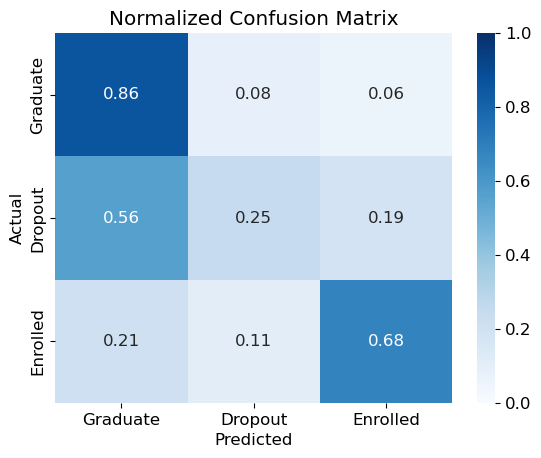

In [29]:
# Fitting a Gaussian Naive Bayes classifier pipeline to the training data and predicting outcomes on the test data.
print("Accuracy: ", gauss_nb_pipeline.score(X_test, y_test))
print(classification_report(y_test, y_gauss_predicted))  # Displays precision, recall, F1-score, and support for each class.
print(confusion_matrix(y_test, y_gauss_predicted))  # Outputs the confusion matrix for the test set.

# Plotting a normalized confusion matrix for the classifier's predictions.
cmat = confusion_matrix(y_test, y_gauss_predicted, normalize='true', labels=([0, 1, 2]))

# Visualization of the normalized confusion matrix using a heatmap.
ax = sns.heatmap(cmat, annot=True, cmap='Blues', fmt='.2f', cbar=True, vmin=0, vmax=1)
ax.set_xlabel('Predicted')  # Labeling the x-axis as 'Predicted'.
ax.set_ylabel('Actual')  # Labeling the y-axis as 'Actual'.
ax.set_title('Normalized Confusion Matrix')  # Setting the title for the plot.
ax.xaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])  # Setting tick labels for the x-axis.
ax.yaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])  # Setting tick labels for the y-axis.
plt.savefig("images/ConfusionMatrix_KNN.png")  # Saving the confusion matrix plot as an image.
plt.show()  # Displaying the plot.


# Random Forest

Random Forest is an ensemble learning method primarily used for classification and regression tasks. It combines multiple decision trees to produce a more robust and accurate model. The basic idea is to build a "forest" of decision trees, each of which makes predictions based on a subset of the data and features. The final prediction is made by aggregating the predictions of all trees in the forest.

**Key Concepts:**

1. **Ensemble Learning:**
   - Random Forest uses the principle of ensemble learning, where multiple models (decision trees) are combined to improve the overall performance compared to individual models. This approach helps to reduce overfitting and variance.

2. **Decision Trees:**
   - Each tree in the Random Forest is a decision tree, which splits the data based on feature values to make predictions. Trees are built by recursively splitting the data into subsets that are as homogeneous as possible.

3. **Bagging (Bootstrap Aggregating):**
   - Random Forest employs a technique called bagging, where multiple subsets of the training data are created by sampling with replacement. Each decision tree is trained on a different subset of the data. This helps in reducing variance and improving the robustness of the model.

4. **Feature Randomness:**
   - During the construction of each decision tree, only a random subset of features is considered at each split. This randomness helps to create diverse trees and improves the model's generalization ability.

5. **Voting/Averaging:**
   - **For Classification:** Each tree in the forest votes for a class, and the class with the majority votes is chosen as the final prediction.
   - **For Regression:** The final prediction is the average of the predictions made by all trees.

**Algorithm:**

1. **Create Multiple Subsets:**
   - Generate multiple bootstrap samples (subsets) of the training data by sampling with replacement.

2. **Build Trees:**
   - For each subset, build a decision tree using a randomly selected subset of features at each split. Continue splitting until a stopping criterion is met (e.g., maximum depth or minimum samples per leaf).

3. **Aggregate Predictions:**
   - **Classification:** Use majority voting to determine the final class label for a given instance.
   - **Regression:** Compute the average of the predictions from all trees to determine the final value.

**Advantages:**

- **Robustness:** Reduces the risk of overfitting compared to individual decision trees.
- **Accuracy:** Often provides high accuracy due to the ensemble approach.
- **Feature Importance:** Can be used to estimate the importance of features in making predictions.
- **Versatility:** Works well with both classification and regression tasks.

**Limitations:**

- **Complexity:** The model can be computationally expensive and less interpretable than a single decision tree.
- **Resource Intensive:** Requires more memory and processing power compared to simpler models.

For more details, please refer to [Random Forest - SKlearn](https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles).

In [32]:

# Define the parameter grid for RandomForestClassifier
n_estimators = [100, 200, 300, 400, 500]  # Number of trees in the forest
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]  # Maximum depth of the trees
grid_rf = {'rf__n_estimators': n_estimators, 'rf__max_depth': max_depth}

# Create a pipeline with a StandardScaler and RandomForestClassifier
rf_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
    ('rf', RandomForestClassifier(n_jobs=-1))  # RandomForestClassifier with parallel processing
])

# Set up GridSearchCV to search over the parameter grid
grid = GridSearchCV(rf_pipeline, param_grid=grid_rf)

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best train params: {grid.best_params_}")
print(f"Best train score: {grid.best_score_}")

# Save the best estimator (pipeline with optimal parameters) to a file
joblib.dump(grid.best_estimator_, 'models/rf_pipeline.joblib')

Best params: {'rf__max_depth': 80, 'rf__n_estimators': 500}
Best score: 0.7793209950535005


['rf_pipeline.joblib']

## Results

Accuracy:  0.7706214689265537
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       418
           1       0.51      0.31      0.39       151
           2       0.85      0.77      0.81       316

    accuracy                           0.77       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.76      0.77      0.75       885

Confusion Matrix: 
 [[393  18   7]
 [ 69  47  35]
 [ 47  27 242]]


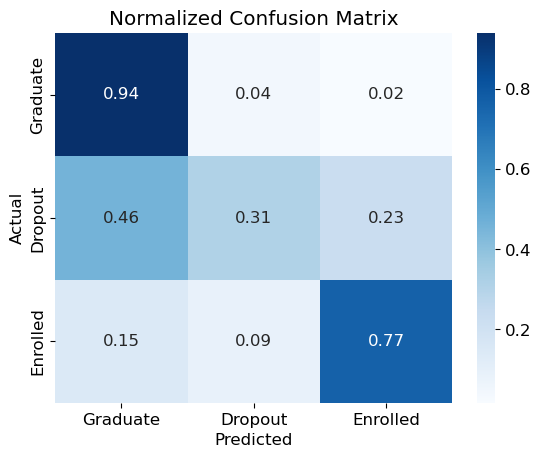

In [33]:
# Load the best Random Forest pipeline from the saved joblib file.
best_rf_pipeline = joblib.load('models/rf_pipeline.joblib')
# - Retrieves the trained Random Forest pipeline from the file 'rf_pipeline.joblib'.

# Print the accuracy of the Random Forest model on the test set.
print("Accuracy: ", best_rf_pipeline.score(X_test, y_test))
# - Evaluates and displays the accuracy of the Random Forest model on the test data.

# Print the classification report for the test set predictions.
print(classification_report(y_test, best_rf_pipeline.predict(X_test)))
# - Provides a detailed classification report including precision, recall, and F1-score for each class.

# Print the confusion matrix for the test set predictions.
print("Confusion Matrix: \n", confusion_matrix(y_test, best_rf_pipeline.predict(X_test)))
# - Displays the confusion matrix showing the counts of true positive, false positive, true negative, and false negative predictions.

# Compute the normalized confusion matrix for better visual comparison.
cmat = confusion_matrix(
      y_test,
      best_rf_pipeline.predict(X_test),
      labels=[0, 1, 2],
      normalize='true')
# - Normalize the confusion matrix to show the proportion of correctly and incorrectly classified instances.
# - Use the labels `[0, 1, 2]` to correspond to classes 'Graduate', 'Dropout', and 'Enrolled'.

# Create a heatmap to visualize the normalized confusion matrix.
ax = sns.heatmap(
    cmat,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True)
# - `annot=True`: Annotate the heatmap with the values from the confusion matrix.
# - `cmap='Blues'`: Use a blue color map for better visibility.
# - `fmt='.2f'`: Format the annotation values to two decimal places.
# - `cbar=True`: Show the color bar on the side of the heatmap.

# Set labels and title for the heatmap.
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Normalized Confusion Matrix')
# - Label the x-axis as 'Predicted' and the y-axis as 'Actual'.
# - Set the title of the heatmap.

# Set tick labels for the x and y axes.
ax.xaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
ax.yaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
# - Use the class names to label the ticks on both x and y axes.

# Save the heatmap as a PNG image file.
plt.savefig("images/ConfusionMatrix_Random_Forest.png")
# - Save the heatmap visualization to a file named 'ConfusionMatrix_Random_Forest.png' in the 'images' directory.

# Display the heatmap.
plt.show()



# XGBoost (Extreme Gradient Boosting)

XGBoost (Extreme Gradient Boosting) is an advanced implementation of gradient boosting designed to be highly efficient, flexible, and portable. It is widely used in machine learning competitions and real-world applications due to its superior performance and scalability. XGBoost can be used for both classification and regression tasks.

**Key Concepts:**

1. **Gradient Boosting:**
   - Gradient Boosting is an ensemble technique that builds models sequentially. Each model corrects the errors of its predecessor by focusing on the residuals (errors) from the previous model. XGBoost is a variant that improves upon traditional gradient boosting.

2. **Boosting:**
   - Boosting involves training a series of models where each subsequent model tries to correct the errors made by the previous models. The final prediction is an aggregate of all individual models' predictions.

3. **Decision Trees as Base Models:**
   - XGBoost uses decision trees as its base models. Each tree is built to minimize the residual errors of the previous trees. The algorithm creates a series of trees where each tree is trained on the errors of the previous ones.

4. **Regularization:**
   - XGBoost includes regularization terms (L1 and L2) to prevent overfitting and improve the model's generalization. Regularization helps to control the complexity of the model and prevents it from fitting noise in the training data.

5. **Handling Missing Values:**
   - XGBoost has built-in mechanisms to handle missing values. It can automatically learn how to handle missing data during training, making it robust to datasets with missing entries.

6. **Parallel and Distributed Computing:**
   - XGBoost is designed to be highly efficient. It supports parallel computing, allowing it to utilize multiple cores for faster training. It also supports distributed computing for handling large datasets.

7. **Feature Importance:**
   - XGBoost can provide insights into the importance of each feature in making predictions. This is useful for feature selection and understanding the impact of different features on the model's performance.

**Algorithm:**

1. **Initialize Model:**
   - Start with an initial prediction, usually the mean of the target values for regression or the log odds of the target for classification.

2. **Iterative Training:**
   - Train a series of decision trees. Each tree is trained to predict the residual errors of the current model.

3. **Update Predictions:**
   - Update the model's predictions by adding the new tree's predictions, weighted by a learning rate (shrinkage).

4. **Regularization:**
   - Apply regularization terms to control the complexity of the trees and improve generalization.

5. **Aggregate Predictions:**
   - Combine the predictions of all trees to make the final prediction. For classification, use techniques like majority voting or softmax probabilities. For regression, average the predictions from all trees.

**Advantages:**

- **High Performance:** XGBoost often provides superior performance compared to other models due to its efficiency and ability to handle large datasets.
- **Flexibility:** Supports various loss functions and can be used for different types of problems.
- **Regularization:** Built-in regularization helps to prevent overfitting.
- **Feature Importance:** Provides insights into the importance of features.

**Limitations:**

- **Complexity:** The model can be complex to tune, with many hyperparameters to optimize.
- **Training Time:** Although efficient, it can still be time-consuming for very large datasets.

For more details, please refer to [XGBoost Documentation](https://xgboost.readthedocs.io/en/stable/).

In [34]:
!pip install xgboost
from xgboost import XGBClassifier

In [35]:
# Define the parameter grid for GridSearchCV to tune the XGBoost model.
grid_params = {
    'xgb__learning_rate': [0.1, 0.2, 0.3],  # Learning rates to test for XGBoost.
    'xgb__n_estimators': [25, 50, 100],     # Number of boosting rounds to test.
    'xgb__booster': ['gbtree', 'gblinear', 'dart', None],  # Types of boosters to test.
    'xgb__subsample': [0.8, 0.9, 1.0],      # Fraction of samples to use for fitting the trees.
    'xgb__max_depth': [5, 6, 7]             # Maximum depth of the trees to test.
}

# Create a pipeline that scales features and applies XGBoost classifier.
xgb_pipeline = Pipeline(steps=[
                                ('scaler', StandardScaler()),  # Standardize features to zero mean and unit variance.
                                ('xgb', XGBClassifier())       # Apply XGBoost classifier.
                               ])

# Initialize GridSearchCV with the XGBoost pipeline and parameter grid.
grid = GridSearchCV(xgb_pipeline, param_grid=grid_params)
# - GridSearchCV will perform an exhaustive search over the specified parameter values.

# Fit the GridSearchCV to the training data to find the best hyperparameters.
grid.fit(X_train, y_train)
# - Trains the XGBoost model with different combinations of hyperparameters and selects the best one.

# Print the best parameters found during the grid search.
print(f"Best train params: {grid.best_params_}")
# - Displays the combination of hyperparameters that resulted in the best performance on the training data.

# Print the best score achieved during the grid search.
print(f"Best train score: {grid.best_score_}")
# - Shows the highest accuracy score achieved with the best hyperparameters on the training data.

# Save the best estimator (model with the best hyperparameters) to a file.
joblib.dump(grid.best_estimator_, 'models/xgb_pipeline.joblib')
# - Saves the trained XGBoost pipeline to 'xgb_pipeline.joblib' for future use, avoiding the need to retrain.


Best params: {'xgb__booster': 'gbtree', 'xgb__learning_rate': 1, 'xgb__n_estimators': 2, 'xgb__objective': 'binary:logistic'}
Best score: 0.7722568503823748


['xgb_pipeline.joblib']

## Results

Accuracy:  0.735593220338983
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       418
           1       0.44      0.28      0.35       151
           2       0.81      0.71      0.76       316

    accuracy                           0.74       885
   macro avg       0.67      0.64      0.64       885
weighted avg       0.72      0.74      0.72       885

Confusion Matrix: 
 [[384  18  16]
 [ 72  43  36]
 [ 56  36 224]]


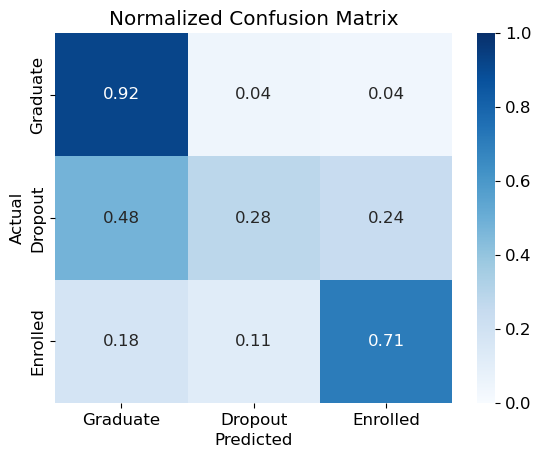

In [36]:
# Load the best XGBoost pipeline from the saved joblib file.
clf_pipe = joblib.load('models/xgb_pipeline.joblib')
# - Retrieves the trained XGBoost pipeline from the file 'xgb_pipeline.joblib'.

# Print the accuracy of the XGBoost model on the test set.
print("Accuracy: ", clf_pipe.score(X_test, y_test))
# - Evaluates and displays the accuracy of the XGBoost model on the test data.

# Print the classification report for the test set predictions.
print(classification_report(y_test, clf_pipe.predict(X_test)))
# - Provides a detailed classification report including precision, recall, and F1-score for each class.

# Print the confusion matrix for the test set predictions.
print("Confusion Matrix: \n", confusion_matrix(y_test, clf_pipe.predict(X_test)))
# - Displays the confusion matrix showing the counts of true positive, false positive, true negative, and false negative predictions.

# Compute the normalized confusion matrix for better visual comparison.
cmat = confusion_matrix(
      y_test,
      clf_pipe.predict(X_test),
      normalize='true',
      labels=[0, 1, 2])
# - Normalize the confusion matrix to show the proportion of correctly and incorrectly classified instances.
# - Use the labels `[0, 1, 2]` to correspond to classes 'Graduate', 'Dropout', and 'Enrolled'.

# Create a heatmap to visualize the normalized confusion matrix.
ax = sns.heatmap(
    cmat,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True,
    vmin=0,
    vmax=1)
# - `annot=True`: Annotate the heatmap with the values from the confusion matrix.
# - `cmap='Blues'`: Use a blue color map for better visibility.
# - `fmt='.2f'`: Format the annotation values to two decimal places.
# - `cbar=True`: Show the color bar on the side of the heatmap.
# - `vmin=0`, `vmax=1`: Set the color bar limits for better visualization.

# Set labels and title for the heatmap.
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Normalized Confusion Matrix')
# - Label the x-axis as 'Predicted' and the y-axis as 'Actual'.
# - Set the title of the heatmap.

# Set tick labels for the x and y axes.
ax.xaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
ax.yaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
# - Use the class names to label the ticks on both x and y axes.

# Save the heatmap as a PNG image file.
plt.savefig("images/ConfusionMatrix_XGB.png")
# - Save the heatmap visualization to a file named 'ConfusionMatrix_XGB.png' in the 'images' directory.

# Display the heatmap.
plt.show()


# Problem!!!
As seen in the previous results, the models tend to mispredict the `"Enrolled"` class. This likely occurs because the target classes are unbalanced, causing the models to be inclined to classify only the `"Dropouts"` and `"Graduates"`. However, one potential solution is to apply class weights in the best models to see if the results become less biased. Another approach is to drop the `"Enrolled"` class, as the study's scope focuses on predicting academic success, and, in this context, the `"Dropouts"` and `"Graduates"` classes should adequately represent the theme.

# SOLUTION!!  
**Lets try to use weighted models.**

## Random Forest (class frequency)

In [37]:
from sklearn.metrics import f1_score, make_scorer

# Create a custom scoring function using F1 score with macro averaging.
f1 = make_scorer(f1_score, average='macro')
# - `make_scorer(f1_score, average='macro')`: Defines a custom scoring function for GridSearchCV.
# - Macro averaging computes the F1 score independently for each class and then takes the average, treating all classes equally.

# Define the parameter grid for Random Forest.
n_estimators = [100, 200, 300, 400, 500]
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
grid_rf = {'rf__n_estimators': n_estimators, 'rf__max_depth': max_depth}
# - `n_estimators`: List of numbers of trees in the forest to test.
# - `max_depth`: List of maximum depths of the trees to test.
# - `grid_rf`: Dictionary defining the hyperparameters to tune.

# Create a pipeline with scaling and RandomForestClassifier.
rf_pipeline = Pipeline(steps=[
                                ('scaler', StandardScaler()),
                                ('rf', RandomForestClassifier(n_jobs=-1, random_state=42, class_weight="balanced_subsample"))
                               ])
# - `StandardScaler()`: Scales features to zero mean and unit variance.
# - `RandomForestClassifier()`: Random Forest model with specified parameters:
#   - `n_jobs=-1`: Use all available cores for training.
#   - `random_state=42`: Ensures reproducibility of results.
#   - `class_weight="balanced_subsample"`: Adjusts weights inversely proportional to class frequencies in each bootstrap sample.

# Perform grid search with cross-validation to find the best parameters.
grid = GridSearchCV(rf_pipeline, param_grid=grid_rf, scoring=f1)
# - `GridSearchCV()`: Searches for the best combination of hyperparameters using cross-validation.
# - `scoring=f1`: Uses the custom F1 score as the evaluation metric.

# Fit the grid search to the training data.
grid.fit(X_train, y_train)
# - `fit()`: Trains the model on the training data while performing hyperparameter tuning.

# Print the best parameters and best score found by grid search.
print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")
# - Displays the best hyperparameters and the corresponding F1 score.

# Save the best estimator from the grid search to a file.
joblib.dump(grid.best_estimator_, 'models/rf_pipeline.joblib')
# - Saves the trained model with the best hyperparameters to 'rf_pipeline.joblib' for future use.


Best params: {'rf__max_depth': 10, 'rf__n_estimators': 500}
Best score: 0.7153740167869288


['rf_pipeline.joblib']

### Results

Accuracy:  0.7491525423728813
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       418
           1       0.44      0.49      0.46       151
           2       0.86      0.71      0.78       316

    accuracy                           0.75       885
   macro avg       0.70      0.69      0.69       885
weighted avg       0.76      0.75      0.75       885

Confusion Matrix: 
 [[366  42  10]
 [ 52  74  25]
 [ 39  54 223]]


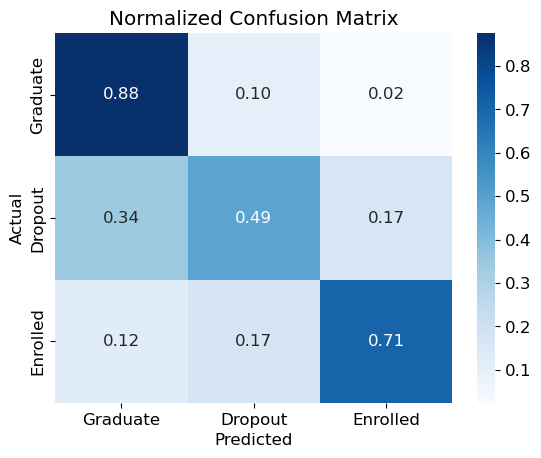

In [38]:
# Load the best Random Forest pipeline from the saved file.
best_rf_pipeline = joblib.load('models/rf_pipeline.joblib')
# - `joblib.load('models/rf_pipeline.joblib')`: Loads the trained Random Forest model with the best hyperparameters.

# Evaluate the model performance on the test set.
print("Accuracy: ", best_rf_pipeline.score(X_test, y_test))
# - `score(X_test, y_test)`: Computes the accuracy of the model on the test data.

print(classification_report(y_test, best_rf_pipeline.predict(X_test)))
# - `classification_report(y_test, best_rf_pipeline.predict(X_test))`: Generates a detailed classification report including precision, recall, and F1-score.

print("Confusion Matrix: \n", confusion_matrix(y_test, best_rf_pipeline.predict(X_test)))
# - `confusion_matrix(y_test, best_rf_pipeline.predict(X_test))`: Computes the confusion matrix to evaluate the performance of the model.

# Compute the normalized confusion matrix.
cmat = confusion_matrix(
      y_test,
      best_rf_pipeline.predict(X_test),
      labels=([0, 1, 2]),
      normalize='true')
# - `normalize='true'`: Normalizes the confusion matrix so that each cell value represents the proportion of the total true values for that class.

# Create a heatmap of the normalized confusion matrix.
ax = sns.heatmap(
    cmat,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True,
    )
# - `sns.heatmap()`: Plots the confusion matrix as a heatmap.
# - `annot=True`: Displays the numerical values in each cell of the heatmap.
# - `cmap='Blues'`: Uses a blue color map for the heatmap.
# - `fmt='.2f'`: Formats the numbers to two decimal places.

# Set labels and title for the heatmap.
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Normalized Confusion Matrix')
ax.xaxis.set_ticklabels(['Graduate', 'Dropout',  'Enrolled'])
ax.yaxis.set_ticklabels(['Graduate', 'Dropout',  'Enrolled'])
# - Sets axis labels and title for the heatmap.
# - `set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])`: Specifies the labels for the classes.

# Save the heatmap to a file.
plt.savefig("images/ConfusionMatrix_Random_Forest_Weighted.png")

plt.show()


## Logistic Regression (class frequency)

In [39]:
from sklearn.linear_model import SGDClassifier
# - Imports the SGDClassifier class from scikit-learn's linear model module.

# Define the F1 score as the metric for model evaluation, using macro averaging.
f1 = make_scorer(f1_score, average='macro')
# - `make_scorer(f1_score, average='macro')`: Creates a scoring function based on the F1 score with macro averaging.

# Define the hyperparameter grid for tuning the SGDClassifier.
params = {
    "sgdclassifier__penalty": ["l1", "l2"],  # Regularization type: L1 or L2 penalty.
    "sgdclassifier__max_iter": [1000, 2000, 3000]  # Number of iterations for optimization.
}

# Create a pipeline that includes scaling and SGDClassifier with specified parameters.
lr_w_classifier_search = Pipeline(steps=[
                                ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance.
                                ('sgdclassifier', SGDClassifier(random_state=42,
                                                                class_weight="balanced",  # Automatically adjust weights inversely proportional to class frequencies.
                                                                early_stopping=True,  # Enable early stopping to avoid overfitting.
                                                                loss="log_loss"  # Use logistic loss for classification.
                                                                ))
                               ])

# Perform grid search with cross-validation to find the best hyperparameters.
grid = GridSearchCV(lr_w_classifier_search, param_grid=params, scoring=f1)
grid.fit(X_train, y_train)

# Print the best parameters and the best score from the grid search.
print(f"Best params: {grid.best_params_}")

print(f"Best score: {grid.best_score_}")

# Save the best pipeline model to a file.
joblib.dump(grid.best_estimator_, 'models/lr_w_classifier_search.joblib')


Best params: {'sgdclassifier__max_iter': 1000, 'sgdclassifier__penalty': 'l1'}
Best score: 0.634069322370783


['lr_w_classifier_search.joblib']

### Results

Accuracy:  0.6384180790960452
              precision    recall  f1-score   support

           0       0.77      0.65      0.71       418
           1       0.29      0.47      0.36       151
           2       0.77      0.70      0.73       316

    accuracy                           0.64       885
   macro avg       0.61      0.61      0.60       885
weighted avg       0.69      0.64      0.66       885

Confusion Matrix: 
 [[272 116  30]
 [ 43  71  37]
 [ 36  58 222]]


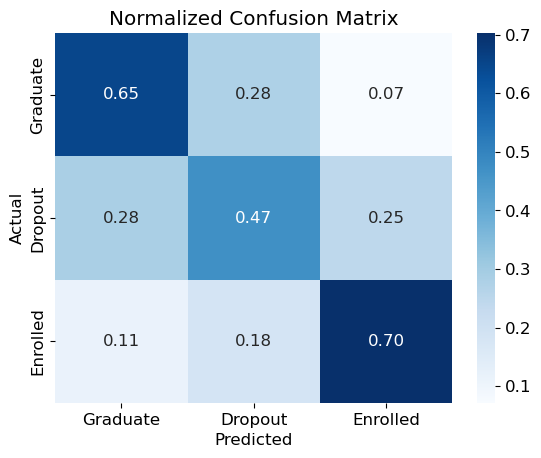

In [40]:
# Load the best model from the saved file.
best_lr_w_classifier_search = joblib.load('models/lr_w_classifier_search.joblib')

# Print the accuracy of the model on the test set.
print("Accuracy: ", best_lr_w_classifier_search.score(X_test, y_test))
# - `best_lr_w_classifier_search.score(X_test, y_test)`: Computes the accuracy of the model on the test data.

# Print a detailed classification report including precision, recall, and F1 score.
print(classification_report(y_test, best_lr_w_classifier_search.predict(X_test)))
# - `classification_report(y_test, best_lr_w_classifier_search.predict(X_test))`: Provides a report of various classification metrics.

# Print the confusion matrix.
print("Confusion Matrix: \n", confusion_matrix(y_test, best_lr_w_classifier_search.predict(X_test)))
# - `confusion_matrix(y_test, best_lr_w_classifier_search.predict(X_test))`: Displays the confusion matrix showing the count of true vs. predicted classes.

# Compute and normalize the confusion matrix for better interpretation.
cmat = confusion_matrix(
      y_test,
      best_lr_w_classifier_search.predict(X_test),
      labels=[0, 1, 2],
      normalize='true'
)

# Create a heatmap to visualize the normalized confusion matrix.
ax = sns.heatmap(
    cmat,
    annot=True,  # Annotate each cell with the numeric value.
    cmap='Blues',  # Color map for the heatmap.
    fmt='.2f',  # Format for the annotations.
    cbar=True  # Display color bar.
)

# Set the labels and title for the heatmap.
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Normalized Confusion Matrix')
ax.xaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])
ax.yaxis.set_ticklabels(['Graduate', 'Dropout', 'Enrolled'])

# Save the heatmap to a file.
plt.savefig("images/ConfusionMatrix_LR_Weighted.png")
plt.show()


# Drop Enrolled
Now we are dropping the "Enrolled" class, so the problem is now binary and it should be a lot easier for the model to classify right.

In [7]:
# Filter the DataFrame to exclude rows where the 'Target' is 'Enrolled'
df_not_enrolled = df[df['Target'] != 'Enrolled']

# Extract the target column from the filtered DataFrame
Y_not_enrolled = df_not_enrolled['Target']

# Drop the 'Target' column from the filtered DataFrame to get the features
x_not_enrolled = df_not_enrolled.drop(['Target'], axis=1)


In [8]:
print(x_not_enrolled.shape)
print(Y_not_enrolled.shape)

print(X.shape)
print(Y.shape)

(3630, 36)
(3630,)
(4424, 36)
(4424, 1)


In [9]:
Y_not_enrolled.value_counts().values

array([2209, 1421], dtype=int64)

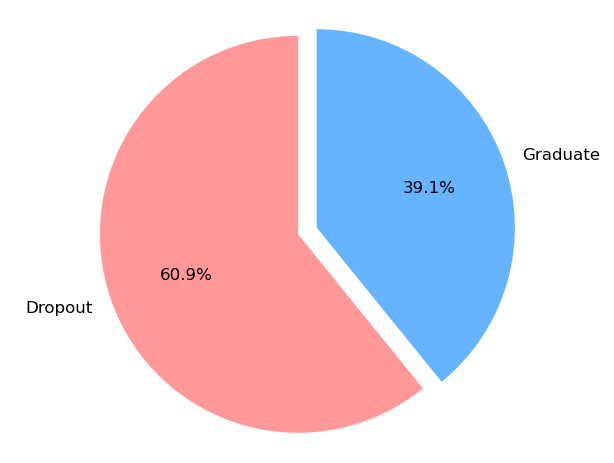

In [10]:
# Update default font size for plots
plt.rcParams.update({'font.size': 12})

# Define labels for the pie chart
labels2 = ['Dropout', 'Graduate']

# Get the count of each unique value in Y_not_enrolled
sizes = Y_not_enrolled.value_counts().values

# Define which slice(s) to "explode" (offset from the center)
explode = (0, 0.1)  # only "explode" the 2nd slice ('Graduate')

# Define colors for the slices
colors = ['#ff9999', '#66b3ff']

# Create a new figure and axis for the pie chart
fig1, ax1 = plt.subplots()

# Create the pie chart
ax1.pie(
    sizes,                  # Sizes of each slice
    explode=explode,        # Slices to explode
    labels=labels2,         # Labels for each slice
    autopct='%1.1f%%',      # Format for percentage labels
    shadow=False,           # Whether to add a shadow
    startangle=90,          # Rotation of the start of the pie chart
    colors=colors           # Colors for each slice
)

# Ensure the pie chart is circular
ax1.axis('equal')

# Adjust the layout to fit all elements
plt.tight_layout()

# Save the pie chart to a file
plt.savefig("images/PieChartNotEnrolled.png")

# Display the pie chart
plt.show()


**Note that the dataset is still unbalanced. So the approach will be to re-train the best models, first using the best parameters found by GridSearch, then using the other alternative(with or without weights). Finally, we print side by side the correlation matrixes**

## Train-Test Split 2

### TSNE plot again :)

In [11]:
# Standardize features by scaling them to have a mean of 0 and a variance of 1
X_scaled = StandardScaler().fit_transform(x_not_enrolled)

# Apply t-SNE to reduce dimensionality to 3D
tsne_3d = TSNE(n_components=3, random_state=42)  # Initialize t-SNE with 3 components and a fixed random state for reproducibility
X_tsne_3d = tsne_3d.fit_transform(X_scaled)     # Fit t-SNE to the scaled data and transform it to 3D

# Convert target labels to integers (0 for 'Graduate', 1 for 'Dropout') and flatten the array to 1D
Y_tsne = Y_not_enrolled.replace({'Graduate': 0, 'Dropout': 1}).astype(int).values.ravel()

# Save the t-SNE results, the scaled data, and the converted target labels to files
joblib.dump(X_tsne_3d, 'models/X_tsne_3d_not_enrolled.joblib')  # Save 3D t-SNE data
joblib.dump(Y_tsne, 'models/Y_tsne_not_enrolled.joblib')        # Save target labels
joblib.dump(X_scaled, 'models/X_scaled_not_enrolled.joblib')     # Save scaled data


C:\Users\gabze\AppData\Local\Temp\ipykernel_5244\1514852604.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_tsne = Y_not_enrolled.replace({'Graduate': 0, 'Dropout': 1}).astype(int).values.ravel()


['models/X_scaled_not_enrolled.joblib']

In [22]:
# Load X and Y from joblib files
X_tsne_3d = joblib.load('models/X_tsne_3d_not_enrolled.joblib')  # Load the 3D t-SNE data
Y_tsne = joblib.load('models/Y_tsne_not_enrolled.joblib')        # Load the target labels

# Define class labels and corresponding colors
class_labels = {0: 'Graduate', 1: 'Dropout'}  # Map class integers to class names
colors = {0: 'blue', 1: 'red'}  # Define colors for each class

# Create a figure with Plotly
fig = go.Figure()

# Add traces for each class to the figure
for class_value, class_name in class_labels.items():
    # Filter data for the current class
    mask = Y_tsne == class_value
    fig.add_trace(go.Scatter3d(
        x=X_tsne_3d[mask, 0],  # x-coordinates for the current class
        y=X_tsne_3d[mask, 1],  # y-coordinates for the current class
        z=X_tsne_3d[mask, 2],  # z-coordinates for the current class
        mode='markers',  # Marker mode for the scatter plot
        marker=dict(
            size=5,  # Marker size
            color=colors[class_value],  # Color based on the class
            opacity=1,  # Marker opacity
        ),
        name=class_name  # Legend entry name
    ))

# Update layout to include axis labels and a legend
fig.update_layout(
    scene=dict(
        xaxis_title='Dimension 1',  # Label for the x-axis
        yaxis_title='Dimension 2',  # Label for the y-axis
        zaxis_title='Dimension 3'   # Label for the z-axis
    ),
    title='3D t-SNE Visualization (without enrolled class)',  # Plot title
    legend=dict(
        x=1,  # Position legend to the right of the plot
        y=0.5,
        traceorder='normal',
        font=dict(
            size=12,  # Font size for the legend
        ),
        bgcolor='rgba(255, 255, 255, 0.5)',  # Background color for the legend (optional)
        bordercolor='black',  # Border color for the legend
        borderwidth=1  # Border width for the legend
    )
)

# Show the plot in a Jupyter Notebook or Colab environment
fig.show(renderer="colab")


In [78]:
# Split the data into training and test sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    x_not_enrolled,  # Features for training and testing
    Y_not_enrolled,  # Target labels for training and testing
    test_size=0.2,   # 20% of the data will be used for testing
    shuffle=True,    # Shuffle the data before splitting
    random_state=42  # Seed for reproducibility
)

# Convert target labels from strings to integers
y_train_2 = y_train_2.replace({'Graduate': 0, 'Dropout': 1}).values.ravel()  # Training labels
y_test_2 = y_test_2.replace({'Graduate': 0, 'Dropout': 1}).values.ravel()    # Test labels


C:\Users\gabze\AppData\Local\Temp\ipykernel_22932\3951955763.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\gabze\AppData\Local\Temp\ipykernel_22932\3951955763.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



## Random Forest 2
Now, a new parameter in the grid was added in order to see if the Weights made the model any better.

In [52]:

# Define the F1 scorer with macro averaging
f1 = make_scorer(f1_score, average='macro')

# Define hyperparameters to search over
n_estimators = [100, 200, 300, 400, 500]  # Number of trees in the forest
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]  # Maximum depth of each tree
grid_rf2 = {
    'rf__n_estimators': n_estimators,  # Number of trees
    'rf__max_depth': max_depth,        # Maximum depth of trees
    'rf__class_weight': ['balanced_subsample', None]  # Handle imbalanced data
}

# Create a pipeline with standard scaling and random forest classifier
rf2_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Scale features
    ('rf', RandomForestClassifier(n_jobs=-1, random_state=42))  # Random Forest model
])

# Setup GridSearchCV to find the best hyperparameters
grid = GridSearchCV(rf2_pipeline, param_grid=grid_rf2, scoring=f1)
grid.fit(X_train_2, y_train_2)  # Fit grid search to training data

# Print the best hyperparameters and best score
print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

# Save the best estimator to a file for later use
joblib.dump(grid.best_estimator_, 'models/rf2_pipeline.joblib')

Best params: {'rf__class_weight': None, 'rf__max_depth': 30, 'rf__n_estimators': 500}
Best score: 0.9030691684121347


['rf2_pipeline.joblib']

In [57]:

# Load the best RandomForest model from the saved file
best_rf_pipeline2 = joblib.load('models/rf2_pipeline.joblib')

# Evaluate the model on the test data
print("Accuracy: ", best_rf_pipeline2.score(X_test_2, y_test_2))  # Print the accuracy score
print(classification_report(y_test_2, best_rf_pipeline2.predict(X_test_2)))  # Print classification report with precision, recall, and F1-score
print("Confusion Matrix: \n", confusion_matrix(y_test_2, best_rf_pipeline2.predict(X_test_2)))  # Print confusion matrix


Accuracy:  0.9008264462809917
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       449
           1       0.92      0.81      0.86       277

    accuracy                           0.90       726
   macro avg       0.91      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726

Confusion Matrix: 
 [[429  20]
 [ 52 225]]


Just for comparison, we'll train a model with `'rf__class_weight': 'balanced_subsample', 'rf__max_depth': 30, 'rf__n_estimators': 500`

In [58]:

# Define the F1 score metric with macro averaging
f1 = make_scorer(f1_score, average='macro')

# Create a pipeline with standard scaling and Random Forest classifier
rf2_pipeline_weight = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
    ('rf', RandomForestClassifier(
        n_jobs=-1,  # Use all available cores for training
        random_state=42,  # Set a seed for reproducibility
        class_weight='balanced_subsample',  # Adjust weights inversely proportional to class frequencies in the training data
        max_depth=30,  # Limit the maximum depth of the trees
        n_estimators=500  # Number of trees in the forest
    ))
])

# Fit the pipeline to the training data
rf2_pipeline_weight.fit(X_train_2, y_train_2)

# Save the trained pipeline to a file for future use
joblib.dump(rf2_pipeline_weight, 'models/rf2_pipeline_weight.joblib')

['rf2_pipeline_weight.joblib']

In [59]:

# Print the accuracy of the model on the test set
print("Accuracy: ", rf2_pipeline_weight.score(X_test_2, y_test_2))

# Print a detailed classification report including precision, recall, and F1 score for each class
print(classification_report(y_test_2, rf2_pipeline_weight.predict(X_test_2)))

# Print the confusion matrix to show the counts of true and predicted class labels
print("Confusion Matrix: \n", confusion_matrix(y_test_2, rf2_pipeline_weight.predict(X_test_2)))


Accuracy:  0.8994490358126722
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       449
           1       0.91      0.82      0.86       277

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726

Confusion Matrix: 
 [[426  23]
 [ 50 227]]


### Results

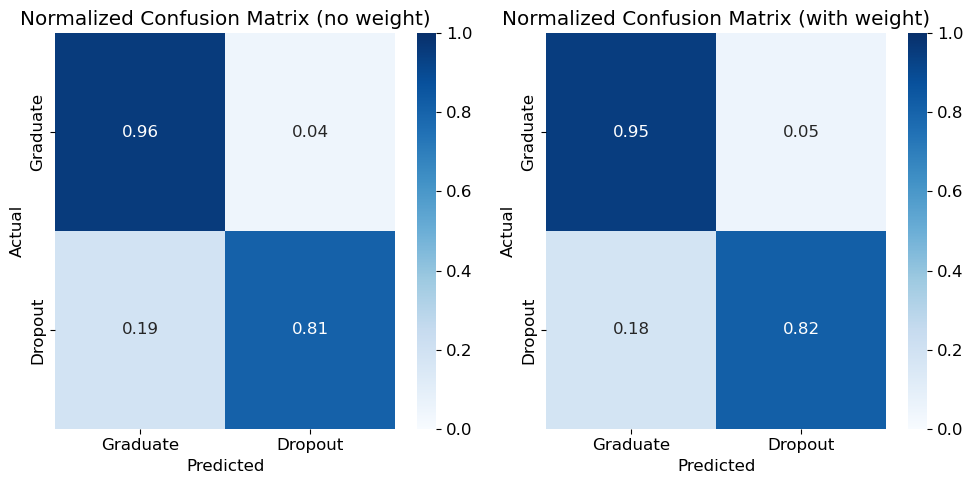

In [60]:

# Load the trained models
best_rf_pipeline2 = joblib.load('models/rf2_pipeline.joblib')
rf2_pipeline_weight = joblib.load('models/rf2_pipeline_weight.joblib')

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Compute normalized confusion matrix for the model without class weights
cmat = confusion_matrix(
    y_test_2,
    best_rf_pipeline2.predict(X_test_2),
    labels=[0, 1],
    normalize='true'
)

# Compute normalized confusion matrix for the model with class weights
cmat_weigh = confusion_matrix(
    y_test_2,
    rf2_pipeline_weight.predict(X_test_2),
    labels=[0, 1],
    normalize='true'
)

# Plot confusion matrix for the model without class weights
sns.heatmap(
    cmat,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True,
    vmax=1,
    vmin=0,
    ax=ax1
)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Normalized Confusion Matrix (no weight)')
ax1.xaxis.set_ticklabels(['Graduate', 'Dropout'])
ax1.yaxis.set_ticklabels(['Graduate', 'Dropout'])

# Plot confusion matrix for the model with class weights
sns.heatmap(
    cmat_weigh,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    cbar=True,
    vmax=1,
    vmin=0,
    ax=ax2
)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_title('Normalized Confusion Matrix (with weight)')
ax2.xaxis.set_ticklabels(['Graduate', 'Dropout'])
ax2.yaxis.set_ticklabels(['Graduate', 'Dropout'])

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("images/ConfusionMatrix_Random_Forest_Weighted2.png")
plt.show()

## Logistic Regression 2

In [61]:
from sklearn.linear_model import SGDClassifier

# Define the F1 scorer with macro averaging
f1 = make_scorer(f1_score, average='macro')

# Define the parameter grid for GridSearchCV
params = {
    "sgdclassifier__penalty": ["l1", "l2"],  # Regularization penalties
    "sgdclassifier__max_iter": [1000, 2000, 3000],  # Number of iterations for convergence
    "sgdclassifier__class_weight": ['balanced', None]  # Handling class imbalance
}

# Create a pipeline with scaling and SGDClassifier
lr_w2_classifier_search = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Standardize features
    ('sgdclassifier', SGDClassifier(random_state=42, early_stopping=True, loss="log_loss"))  # SGDClassifier with early stopping and log loss
])

# Perform grid search with cross-validation
grid = GridSearchCV(lr_w2_classifier_search, param_grid=params, scoring=f1)
grid.fit(X_train_2, y_train_2)

# Print the best parameters and score from the grid search
print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

# Save the best estimator
joblib.dump(grid.best_estimator_, 'models/lr_w2_classifier_search.joblib')

# Evaluate the best model on the test set
print("Accuracy: ", grid.score(X_test_2, y_test_2))
print(classification_report(y_test_2, grid.predict(X_test_2)))

Best params: {'sgdclassifier__class_weight': None, 'sgdclassifier__max_iter': 1000, 'sgdclassifier__penalty': 'l1'}
Best score: 0.8673902707830331
Accuracy:  0.8706579145320801
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       449
           1       0.81      0.88      0.84       277

    accuracy                           0.88       726
   macro avg       0.87      0.88      0.87       726
weighted avg       0.88      0.88      0.88       726



For comparison lets also create a weighted model too.

In [62]:

# Define a pipeline that standardizes features and then applies SGDClassifier
lr_w2_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Step 1: Standardize features to have zero mean and unit variance
    ('sgdclassifier', SGDClassifier(
        random_state=42,             # Ensures that the results are reproducible
        early_stopping=True,         # Stops training early if no improvement on the validation set
        loss="log_loss",             # Uses logistic loss function (logistic regression)
        penalty='l1',                # Applies L1 regularization to induce sparsity
        max_iter=1000,               # Maximum number of iterations for training
        class_weight='balanced'      # Adjusts weights inversely proportional to class frequencies to handle class imbalance
    ))
])

# Train the pipeline on the training data
lr_w2_pipeline.fit(X_train_2, y_train_2)

# Save the trained pipeline to a file for future use
joblib.dump(lr_w2_pipeline, 'models/lr_w2_pipeline.joblib')

# Evaluate the pipeline on the test data and print the results
print("Accuracy: ", lr_w2_pipeline.score(X_test_2, y_test_2))  # Print the accuracy of the model
print(classification_report(y_test_2, lr_w2_pipeline.predict(X_test_2)))  # Print detailed classification report

Accuracy:  0.8760330578512396
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       449
           1       0.82      0.86      0.84       277

    accuracy                           0.88       726
   macro avg       0.87      0.87      0.87       726
weighted avg       0.88      0.88      0.88       726



### Results

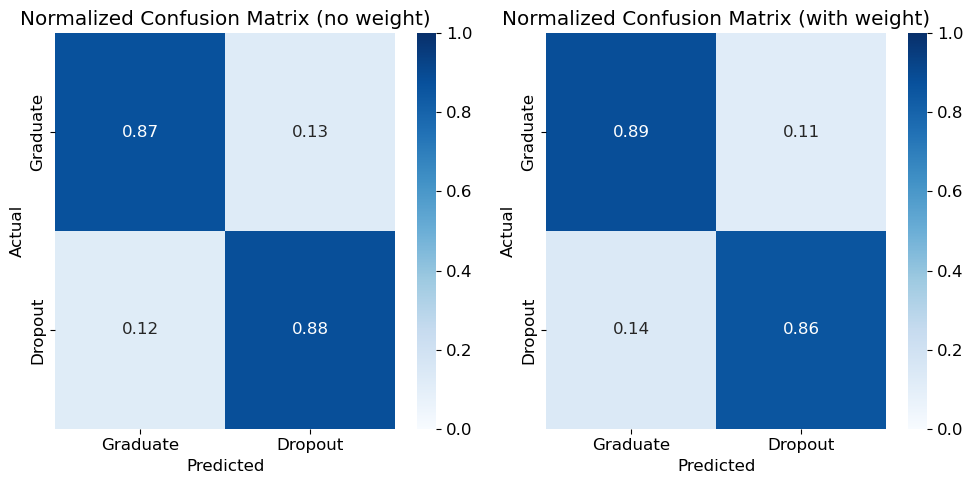

In [63]:

# Load the trained models from joblib files
best_lr_w2_classifier_search = joblib.load('models/lr_w2_classifier_search.joblib')
lr_w2_pipeline = joblib.load('models/lr_w2_pipeline.joblib')

# Create subplots to display confusion matrices side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Compute confusion matrices for both models
cmat_weigh = confusion_matrix(
    y_test_2,
    lr_w2_pipeline.predict(X_test_2),  # Predictions from the pipeline with weights
    labels=[0, 1],  # Labels for the confusion matrix
    normalize='true'  # Normalize the matrix to show proportions
)

cmat = confusion_matrix(
    y_test_2,
    best_lr_w2_classifier_search.predict(X_test_2),  # Predictions from the grid search model
    labels=[0, 1],  # Labels for the confusion matrix
    normalize='true'  # Normalize the matrix to show proportions
)

# Plot confusion matrix for the pipeline with weights
sns.heatmap(
    cmat,
    annot=True,        # Annotate cells with the numeric value
    cmap='Blues',     # Color map
    fmt='.2f',        # Format for the annotation text
    cbar=True,        # Display color bar
    vmax=1,           # Maximum value for the color scale
    vmin=0,           # Minimum value for the color scale
    ax=ax1            # Axes for the plot
)
ax1.set_xlabel('Predicted')          # Label for x-axis
ax1.set_ylabel('Actual')            # Label for y-axis
ax1.set_title('Normalized Confusion Matrix (no weight)')  # Title for the plot
ax1.xaxis.set_ticklabels(['Graduate', 'Dropout'])  # Set labels for x-axis ticks
ax1.yaxis.set_ticklabels(['Graduate', 'Dropout'])  # Set labels for y-axis ticks

# Plot confusion matrix for the grid search model
sns.heatmap(
    cmat_weigh,
    annot=True,        # Annotate cells with the numeric value
    cmap='Blues',     # Color map
    fmt='.2f',        # Format for the annotation text
    cbar=True,        # Display color bar
    vmax=1,           # Maximum value for the color scale
    vmin=0,           # Minimum value for the color scale
    ax=ax2            # Axes for the plot
)
ax2.set_xlabel('Predicted')          # Label for x-axis
ax2.set_ylabel('Actual')            # Label for y-axis
ax2.set_title('Normalized Confusion Matrix (with weight)')  # Title for the plot
ax2.xaxis.set_ticklabels(['Graduate', 'Dropout'])  # Set labels for x-axis ticks
ax2.yaxis.set_ticklabels(['Graduate', 'Dropout'])  # Set labels for y-axis ticks

# Adjust layout to ensure plots fit well
plt.tight_layout()

# Save the figure to a file
plt.savefig("images/ConfusionMatrix_LR2.png")

# Display the plot
plt.show()

## XGBClassifier (weighted)

In [68]:

# Define F1 score as the scoring metric with macro averaging
f1 = make_scorer(f1_score, average='macro')

# Define parameter grid for GridSearchCV
params = {
    "xgb__scale_pos_weight": [4, 5, 6],          # Adjusts the balance of positive and negative weights
    'xgb__learning_rate': [0.1, 0.2, 0.3],       # Learning rate for boosting
    'xgb__n_estimators': [25, 50, 100],           # Number of boosting rounds
    'xgb__booster': ['gbtree', 'gblinear', 'dart', None]  # Type of boosting model
}

# Create a pipeline with a scaler and XGBClassifier
xgb_classifier2_search = Pipeline(steps=[
    ('scaler', StandardScaler()),                   # Standardize features by removing the mean and scaling to unit variance
    ('xgb', XGBClassifier(random_state=42, n_jobs=-1))  # XGBoost classifier with random state for reproducibility and parallel processing
])

# Initialize GridSearchCV with the pipeline and parameter grid
grid = GridSearchCV(xgb_classifier2_search, param_grid=params, scoring=f1)

# Fit GridSearchCV to the training data
grid.fit(X_train_2, y_train_2)

# Print best parameters and score found by GridSearchCV
print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

# Save the best model from GridSearchCV to a file
joblib.dump(grid.best_estimator_, 'models/xgb_classifier2_search.joblib')

Best params: {'xgb__booster': 'gbtree', 'xgb__learning_rate': 0.3, 'xgb__n_estimators': 50, 'xgb__scale_pos_weight': 4}
Best score: 0.8941740934578906


['xgb_classifier2_search.joblib']

In [74]:

# Create a pipeline with a scaler and XGBClassifier
xgb_classifier2_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
    ('xgb', XGBClassifier(
        random_state=42,            # Set random state for reproducibility
        booster='gbtree',           # Use gradient boosted trees
        learning_rate=0.3,          # Set learning rate for boosting
        n_estimators=50,            # Set the number of boosting rounds
        n_jobs=-1                    # Use all available cores for parallel processing
    ))
])

# Fit the pipeline to the training data
xgb_classifier2_pipeline.fit(X_train_2, y_train_2)

# Evaluate the pipeline on the test data
print("Accuracy: ", xgb_classifier2_pipeline.score(X_test_2, y_test_2))  # Print accuracy score
print(classification_report(y_test_2, xgb_classifier2_pipeline.predict(X_test_2)))  # Print classification report

# Save the trained pipeline to a file for later use
joblib.dump(xgb_classifier2_pipeline, 'models/xgb_classifier2_pipeline.joblib')

Accuracy:  0.9008264462809917
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       449
           1       0.89      0.84      0.87       277

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.89       726
weighted avg       0.90      0.90      0.90       726



['xgb_classifier2_pipeline.joblib']

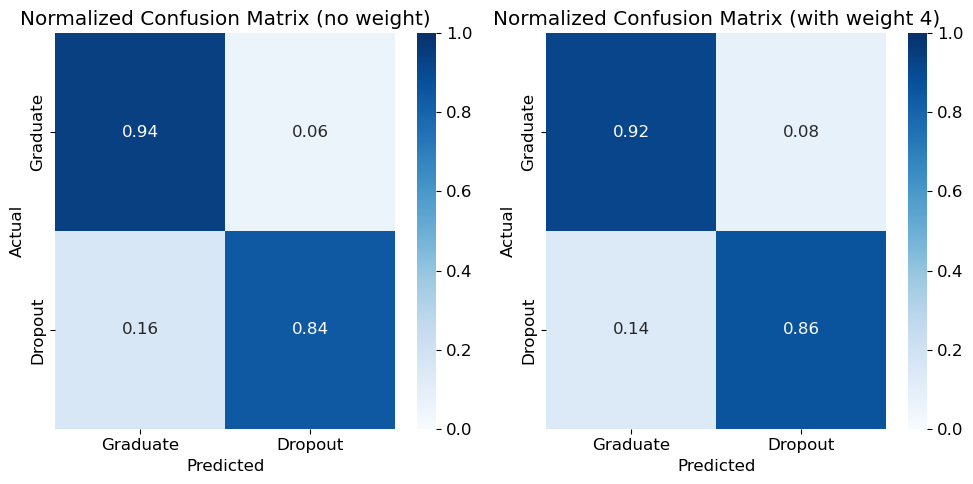

In [79]:

# Load the best XGBoost classifier and the pipeline
xgb_best_classifier2 = joblib.load('models/xgb_classifier2_search.joblib')
xgb_classifier2_pipeline = joblib.load('models/xgb_classifier2_pipeline.joblib')

# Create a subplot with 2 columns for side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Compute normalized confusion matrix for the best classifier found in grid search
cmat_weigh = confusion_matrix(
    y_test_2,
    xgb_best_classifier2.predict(X_test_2),  # Predictions from the best classifier
    labels=[0, 1],  # Class labels
    normalize='true'  # Normalize by the true total number of samples
)

# Compute normalized confusion matrix for the classifier trained with specific parameters
cmat = confusion_matrix(
    y_test_2,
    xgb_classifier2_pipeline.predict(X_test_2),  # Predictions from the specific parameter classifier
    labels=[0, 1],  # Class labels
    normalize='true'  # Normalize by the true total number of samples
)

# Plot the confusion matrix for the classifier without class weight
sns.heatmap(
    cmat,
    annot=True,  # Annotate cells with numeric values
    cmap='Blues',  # Color map for the heatmap
    fmt='.2f',  # Format for numeric values
    cbar=True,  # Display color bar
    vmax=1,  # Maximum value for color map
    vmin=0,  # Minimum value for color map
    ax=ax1  # Plot on the first subplot
)
ax1.set_xlabel('Predicted')  # X-axis label
ax1.set_ylabel('Actual')  # Y-axis label
ax1.set_title('Normalized Confusion Matrix (no weight)')  #


# CONCLUSION

## ROC curves of the best classifiers

In [ ]:
#show the curves




## Precision and Recall curves of the best models

In [ ]:
#show the curves